# ER Operations Analysis: Patient Flow & Throughput Optimization
## Meridian City Hospital - Delay Analysis & Solutions

**Team:** ACM  
**Date:** 2024  
**Objective:** Identify primary causes of delays and propose actionable solutions to improve ER throughput, staffing efficiency, and operational performance

---

## 🎯 Analysis Objectives

1. **Patient Flow Analysis** - Understand patient journey through ER
2. **Delay Identification** - Identify bottlenecks and delay causes
3. **Throughput Optimization** - Analyze processing times and efficiency
4. **Staffing Efficiency** - Evaluate staffing impact on operations
5. **Operational Performance** - Assess overall ER performance metrics
6. **Actionable Insights** - Propose data-driven solutions

---

## 📊 Key Questions to Answer

- What are the primary delay points in patient flow?
- How do wait times vary by time of day, day of week, or season?
- What is the impact of staffing levels on throughput?
- Which factors correlate most strongly with delays?
- How can we optimize resource allocation?
- What are the bottlenecks in the ER process?

---

## 🗺️ Analysis Roadmap

1. **Data Loading & Exploration** - Load and understand the data
2. **Patient Flow Mapping** - Map patient journey through ER
3. **Delay Analysis** - Identify and quantify delays
4. **Time-Based Patterns** - Analyze temporal patterns
5. **Staffing Impact** - Evaluate staffing efficiency
6. **Bottleneck Identification** - Find process bottlenecks
7. **Root Cause Analysis** - Identify primary delay causes
8. **Solutions & Recommendations** - Propose actionable solutions


## Section 1: Data Loading & Exploration


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Initialize findings
findings = {
    'delays': [],
    'bottlenecks': [],
    'insights': [],
    'recommendations': []
}

print("✓ Imports completed")


✓ Imports completed


In [2]:
# ============================================================================
# LOAD CLEANED & JOINED DATASET
# ============================================================================

# Update this path to your joined/cleaned dataset
df = pd.read_csv('joined_data.csv')  # UPDATE THIS PATH

print("=" * 80)
print("DATASET LOADED")
print("=" * 80)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n" + "=" * 80)
print("FIRST FEW ROWS")
print("=" * 80)
display(df.head())

# Column information
print("\n" + "=" * 80)
print("COLUMN INFORMATION")
print("=" * 80)
print(f"\nTotal columns: {len(df.columns)}")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    print(f"  {i:2d}. {col:<40} ({dtype})")

# Identify key columns for ER operations analysis
print("\n" + "=" * 80)
print("IDENTIFYING KEY COLUMNS FOR ER OPERATIONS")
print("=" * 80)

# Time-related columns
time_cols = [col for col in df.columns if any(term in col.lower() for term in 
              ['time', 'date', 'arrival', 'triage', 'discharge', 'wait', 'duration', 'length'])]
print(f"\nTime-related columns: {time_cols}")

# Patient flow columns
flow_cols = [col for col in df.columns if any(term in col.lower() for term in 
             ['status', 'stage', 'phase', 'disposition', 'triage', 'priority', 'severity'])]
print(f"Patient flow columns: {flow_cols}")

# Staffing columns
staffing_cols = [col for col in df.columns if any(term in col.lower() for term in 
                 ['staff', 'nurse', 'doctor', 'physician', 'provider', 'personnel'])]
print(f"Staffing columns: {staffing_cols}")

# Numerical columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(df.select_dtypes(include=['object', 'category']).columns)}")

findings['insights'].append(f"Dataset loaded: {df.shape[0]:,} records with {df.shape[1]} features")


DATASET LOADED
Shape: 15,000 rows × 17 columns
Memory: 13.61 MB

FIRST FEW ROWS


,Visit ID,Patient ID,Hospital ID,Arrival Time,Registration Start,Registration End,Triage Start,Triage End,Doctor Seen,Exit Time,Triage Level,Arrival To Exit,Arrived At Shift,Right_Patient ID,Age,Gender,Insurance
0,V111883,MC180325-3746,MC_ER_EAST,2025-02-16 14:06:00,2025-02-16 14:08:00,2025-02-16 14:15:00,2025-02-16 14:20:00,2025-02-16 14:35:00,2025-02-16 15:09:00,2025-02-16 16:52:00,urgent,166,DAY,MC180325-3746,98,MALE,UNINSURED
1,V106060,MC180325-3746,MC_ER_EAST,2025-02-15 11:16:00,2025-02-15 11:20:00,2025-02-15 11:26:00,2025-02-15 11:33:00,2025-02-15 11:39:00,2025-02-15 12:09:00,2025-02-15 13:45:00,nonurgent,149,DAY,MC180325-3746,98,MALE,UNINSURED
2,V113266,MC180325-3746,MC_ER_EAST,2025-01-14 13:26:00,2025-01-14 13:29:00,2025-01-14 13:39:00,2025-01-14 13:42:00,2025-01-14 13:54:00,2025-01-14 14:27:00,2025-01-14 15:24:00,nonurgent,118,DAY,MC180325-3746,98,MALE,UNINSURED
3,V104373,MC180325-3746,MC_ER_EAST,2025-01-14 17:57:00,2025-01-14 17:58:00,2025-01-14 18:08:00,2025-01-14 18:11:00,2025-01-14 18:25:00,2025-01-14 18:58:00,2025-01-14 21:02:00,emergent,185,EVENING,MC180325-3746,98,MALE,UNINSURED
4,V105553,MC180325-2767,MC_ER_EAST,2025-03-21 14:06:00,2025-03-21 14:09:00,2025-03-21 14:19:00,2025-03-21 14:21:00,2025-03-21 14:38:00,2025-03-21 15:05:00,2025-03-21 16:31:00,urgent,145,DAY,MC180325-2767,37,FEMALE,UNINSURED



COLUMN INFORMATION

Total columns: 17
   1. Visit ID                                 (object)
   2. Patient ID                               (object)
   3. Hospital ID                              (object)
   4. Arrival Time                             (object)
   5. Registration Start                       (object)
   6. Registration End                         (object)
   7. Triage Start                             (object)
   8. Triage End                               (object)
   9. Doctor Seen                              (object)
  10. Exit Time                                (object)
  11. Triage Level                             (object)
  12. Arrival To Exit                          (int64)
  13. Arrived At Shift                         (object)
  14. Right_Patient ID                         (object)
  15. Age                                      (int64)
  16. Gender                                   (object)
  17. Insurance                                (object)

IDENTIFYIN

## Section 2: Patient Flow Mapping & Timeline Analysis


PATIENT FLOW MAPPING

Time columns to convert: ['Arrival Time', 'Triage Start', 'Triage End', 'Exit Time']
✓ Converted Arrival Time to datetime (15,000 valid values)
✓ Converted Triage Start to datetime (15,000 valid values)
✓ Converted Triage End to datetime (15,000 valid values)
✓ Converted Exit Time to datetime (15,000 valid values)

Identified timeline columns:
  Arrival: Arrival Time
  Exit/Discharge: Exit Time
  Triage Start: Triage Start
  Triage End: Triage End

✓ Calculating length of stay from arrival and exit times

--------------------------------------------------------------------------------
LENGTH OF STAY STATISTICS
--------------------------------------------------------------------------------
Mean: 2.87 hours
Median: 2.85 hours
Min: 1.22 hours
Max: 5.35 hours
75th percentile: 3.22 hours
90th percentile: 3.55 hours
Valid records: 15,000 / 15,000


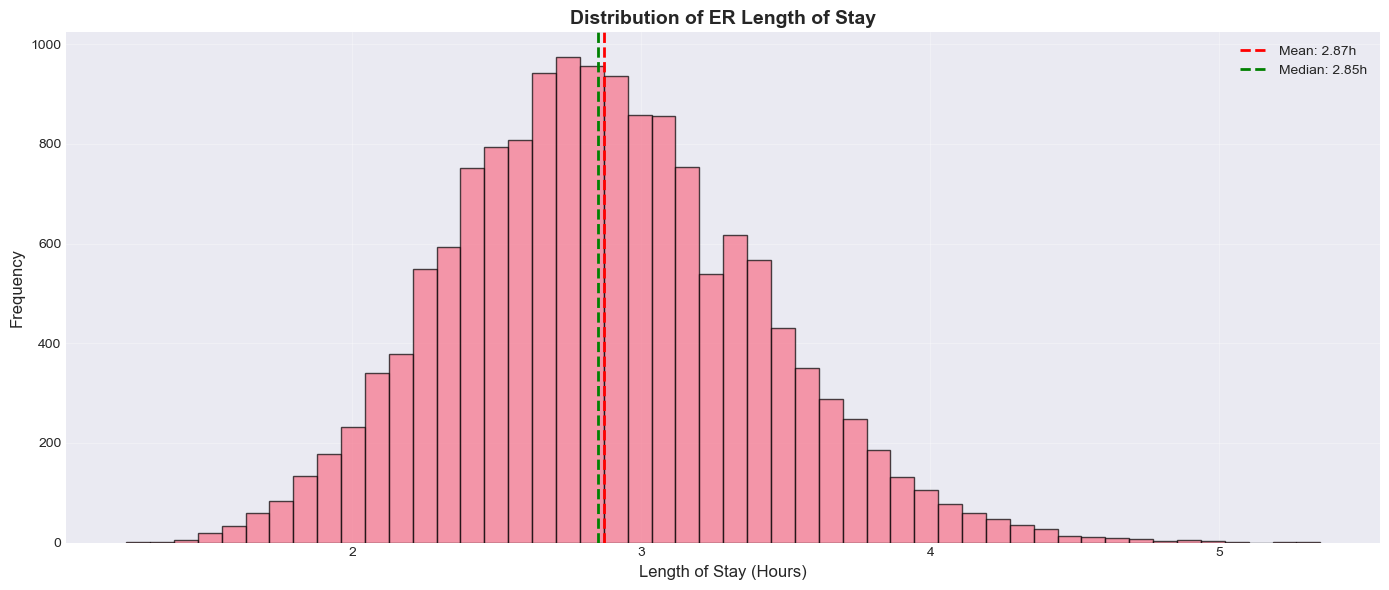


✓ Extracted time components from Arrival Time
✓ Calculated wait time to triage: 13.75 minutes (avg)
✓ Calculated triage duration: 12.57 minutes (avg)


In [3]:
# ============================================================================
# PATIENT FLOW MAPPING
# ============================================================================

print("=" * 80)
print("PATIENT FLOW MAPPING")
print("=" * 80)

# Filter out non-time columns from time_cols (like 'Triage Level', 'Arrival To Exit')
actual_time_cols = [col for col in time_cols 
                    if col not in ['Triage Level', 'Arrival To Exit'] 
                    and ('time' in col.lower() or 'date' in col.lower() or 'start' in col.lower() or 'end' in col.lower())]

print(f"\nTime columns to convert: {actual_time_cols}")

# Convert date/time columns to datetime
for col in actual_time_cols:
    if col in df.columns and df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            converted_count = df[col].notna().sum()
            print(f"✓ Converted {col} to datetime ({converted_count:,} valid values)")
        except Exception as e:
            print(f"✗ Could not convert {col}: {e}")

# Identify timeline columns more accurately
arrival_col = None
discharge_col = None  # Also called Exit Time
triage_start_col = None
triage_end_col = None

# Try to identify these columns automatically
for col in df.columns:
    col_lower = col.lower()
    # Arrival column
    if ('arrival' in col_lower and 'time' in col_lower) and arrival_col is None:
        arrival_col = col
    # Discharge/Exit column
    if ('exit' in col_lower and 'time' in col_lower) or ('discharge' in col_lower) or ('departure' in col_lower):
        discharge_col = col
    # Triage columns
    if 'triage start' in col_lower:
        triage_start_col = col
    if 'triage end' in col_lower:
        triage_end_col = col

print(f"\nIdentified timeline columns:")
print(f"  Arrival: {arrival_col}")
print(f"  Exit/Discharge: {discharge_col}")
print(f"  Triage Start: {triage_start_col}")
print(f"  Triage End: {triage_end_col}")

# Calculate Length of Stay - Use existing 'Arrival To Exit' if available, or calculate from times
if 'Arrival To Exit' in df.columns and df['Arrival To Exit'].dtype in [np.number]:
    # Use existing duration column (appears to be in minutes based on column name)
    print("\n✓ Using existing 'Arrival To Exit' column for length of stay")
    df['Length_of_Stay_Minutes'] = df['Arrival To Exit']
    df['Length_of_Stay_Hours'] = df['Length_of_Stay_Minutes'] / 60
    
elif arrival_col and discharge_col and df[arrival_col].dtype == 'datetime64[ns]' and df[discharge_col].dtype == 'datetime64[ns]':
    # Calculate from datetime columns
    print("\n✓ Calculating length of stay from arrival and exit times")
    df['Length_of_Stay_Minutes'] = (df[discharge_col] - df[arrival_col]).dt.total_seconds() / 60
    df['Length_of_Stay_Hours'] = df['Length_of_Stay_Minutes'] / 60
else:
    print("\n⚠ Could not calculate length of stay - missing required time columns")
    if arrival_col is None:
        print("   Missing: Arrival time column")
    if discharge_col is None:
        print("   Missing: Exit/Discharge time column")

# Display length of stay statistics if available
if 'Length_of_Stay_Hours' in df.columns:
    print("\n" + "-" * 80)
    print("LENGTH OF STAY STATISTICS")
    print("-" * 80)
    
    valid_los = df['Length_of_Stay_Hours'].dropna()
    if len(valid_los) > 0:
        print(f"Mean: {valid_los.mean():.2f} hours")
        print(f"Median: {valid_los.median():.2f} hours")
        print(f"Min: {valid_los.min():.2f} hours")
        print(f"Max: {valid_los.max():.2f} hours")
        print(f"75th percentile: {valid_los.quantile(0.75):.2f} hours")
        print(f"90th percentile: {valid_los.quantile(0.90):.2f} hours")
        print(f"Valid records: {len(valid_los):,} / {len(df):,}")
        
        # Visualize distribution
        plt.figure(figsize=(14, 6))
        valid_los.hist(bins=50, edgecolor='black', alpha=0.7)
        plt.axvline(valid_los.mean(), color='red', linestyle='--', 
                    label=f'Mean: {valid_los.mean():.2f}h', linewidth=2)
        plt.axvline(valid_los.median(), color='green', linestyle='--', 
                    label=f'Median: {valid_los.median():.2f}h', linewidth=2)
        plt.xlabel('Length of Stay (Hours)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title('Distribution of ER Length of Stay', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        findings['insights'].append(f"Average ER length of stay: {valid_los.mean():.2f} hours (median: {valid_los.median():.2f}h)")
    else:
        print("⚠ No valid length of stay data available")

# Extract time components for analysis from arrival time
if arrival_col and arrival_col in df.columns:
    if df[arrival_col].dtype == 'datetime64[ns]':
        df['Arrival_Hour'] = df[arrival_col].dt.hour
        df['Arrival_DayOfWeek'] = df[arrival_col].dt.dayofweek
        df['Arrival_Month'] = df[arrival_col].dt.month
        df['Arrival_Date'] = df[arrival_col].dt.date
        print(f"\n✓ Extracted time components from {arrival_col}")
    else:
        print(f"\n⚠ {arrival_col} is not a datetime column - cannot extract time components")

# Calculate additional flow metrics if we have the time data
if arrival_col and triage_start_col and arrival_col in df.columns and triage_start_col in df.columns:
    if df[arrival_col].dtype == 'datetime64[ns]' and df[triage_start_col].dtype == 'datetime64[ns]':
        df['Wait_To_Triage_Minutes'] = (df[triage_start_col] - df[arrival_col]).dt.total_seconds() / 60
        print(f"✓ Calculated wait time to triage: {df['Wait_To_Triage_Minutes'].mean():.2f} minutes (avg)")

if triage_start_col and triage_end_col and triage_start_col in df.columns and triage_end_col in df.columns:
    if df[triage_start_col].dtype == 'datetime64[ns]' and df[triage_end_col].dtype == 'datetime64[ns]':
        df['Triage_Duration_Minutes'] = (df[triage_end_col] - df[triage_start_col]).dt.total_seconds() / 60
        print(f"✓ Calculated triage duration: {df['Triage_Duration_Minutes'].mean():.2f} minutes (avg)")


## Section 3: Delay Analysis & Bottleneck Identification


DELAY ANALYSIS & BOTTLENECK IDENTIFICATION

--------------------------------------------------------------------------------
DELAY CATEGORIZATION
--------------------------------------------------------------------------------


,Count
Delay_Category,
Excellent (<1h),0
Good (1-2h),641
Moderate (2-4h),14038
Delayed (4-8h),321
Severe Delay (>8h),0



Delay Distribution (%):
  Excellent (<1h): 0.0%
  Good (1-2h): 4.3%
  Moderate (2-4h): 93.6%
  Delayed (4-8h): 2.1%
  Severe Delay (>8h): 0.0%


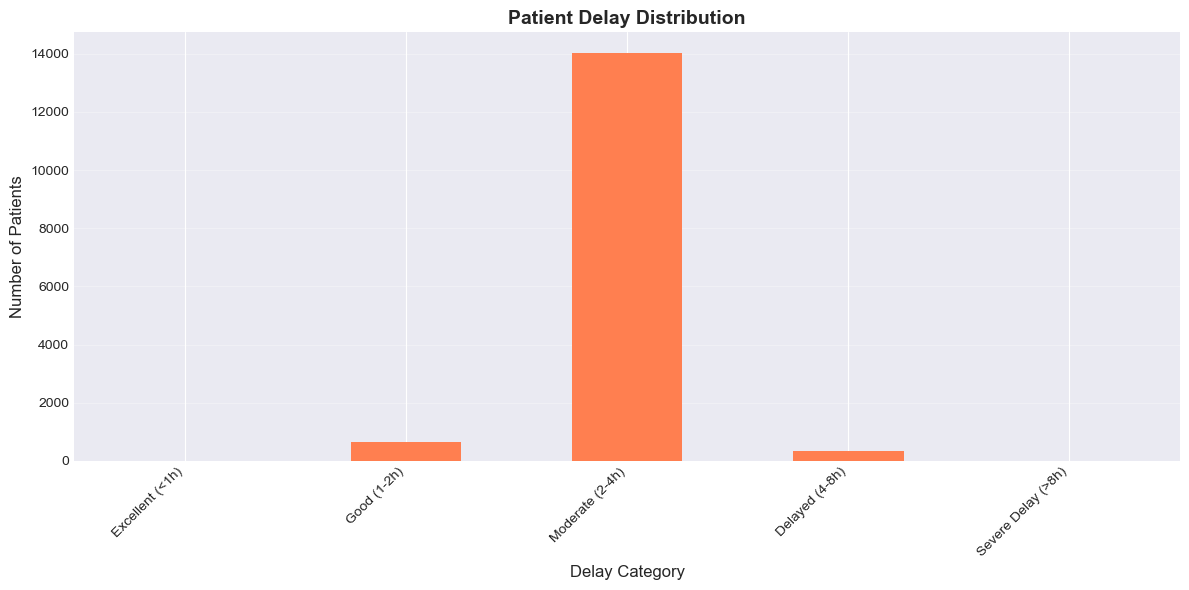


--------------------------------------------------------------------------------
EXCESSIVE DELAYS (> 3.5 hours / 90th percentile)
--------------------------------------------------------------------------------
Total patients with excessive delays: 1,465 (9.8%)

--------------------------------------------------------------------------------
DELAY FACTOR ANALYSIS
--------------------------------------------------------------------------------


In [4]:
# ============================================================================
# DELAY ANALYSIS
# ============================================================================

print("=" * 80)
print("DELAY ANALYSIS & BOTTLENECK IDENTIFICATION")
print("=" * 80)

# Define delay thresholds (adjust based on industry standards or your data)
# Typical ER benchmarks: < 1 hour = excellent, 1-2 hours = good, > 2 hours = delay
if 'Length_of_Stay_Hours' in df.columns:
    df['Delay_Category'] = pd.cut(
        df['Length_of_Stay_Hours'],
        bins=[0, 1, 2, 4, 8, float('inf')],
        labels=['Excellent (<1h)', 'Good (1-2h)', 'Moderate (2-4h)', 'Delayed (4-8h)', 'Severe Delay (>8h)']
    )
    
    print("\n" + "-" * 80)
    print("DELAY CATEGORIZATION")
    print("-" * 80)
    delay_distribution = df['Delay_Category'].value_counts().sort_index()
    display(delay_distribution.to_frame('Count'))
    
    # Calculate delay percentages
    delay_pct = (delay_distribution / len(df) * 100).round(2)
    print("\nDelay Distribution (%):")
    for category, pct in delay_pct.items():
        print(f"  {category}: {pct:.1f}%")
        if 'Delay' in str(category) or 'Severe' in str(category):
            findings['delays'].append(f"{pct:.1f}% of patients experience {category}")
    
    # Visualize delay distribution
    plt.figure(figsize=(12, 6))
    delay_distribution.plot(kind='bar', color='coral')
    plt.title('Patient Delay Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Delay Category', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Identify patients with excessive delays
if 'Length_of_Stay_Hours' in df.columns:
    # Define excessive delay threshold (e.g., > 4 hours or 90th percentile)
    delay_threshold = df['Length_of_Stay_Hours'].quantile(0.90)
    excessive_delays = df[df['Length_of_Stay_Hours'] > delay_threshold].copy()
    
    print("\n" + "-" * 80)
    print(f"EXCESSIVE DELAYS (> {delay_threshold:.1f} hours / 90th percentile)")
    print("-" * 80)
    print(f"Total patients with excessive delays: {len(excessive_delays):,} ({len(excessive_delays)/len(df)*100:.1f}%)")
    
    findings['bottlenecks'].append(f"{len(excessive_delays):,} patients ({len(excessive_delays)/len(df)*100:.1f}%) experience delays > {delay_threshold:.1f} hours")

# Analyze delay factors
print("\n" + "-" * 80)
print("DELAY FACTOR ANALYSIS")
print("-" * 80)

# Compare delays across different categories
if 'Length_of_Stay_Hours' in df.columns:
    delay_analysis = {}
    
    # Analyze by categorical variables
    for col in flow_cols + ['Arrival_Hour', 'Arrival_DayOfWeek']:
        if col in df.columns and df[col].notna().any():
            if df[col].nunique() < 20:  # Only for reasonable number of categories
                delay_by_category = df.groupby(col)['Length_of_Stay_Hours'].agg(['mean', 'median', 'count'])
                delay_by_category = delay_by_category.sort_values('mean', ascending=False)
                
                # Identify categories with longest delays
                worst_category = delay_by_category.index[0]
                worst_avg_delay = delay_by_category.loc[worst_category, 'mean']
                best_category = delay_by_category.index[-1]
                best_avg_delay = delay_by_category.loc[best_category, 'mean']
                
                if worst_avg_delay > delay_by_category['mean'].mean() * 1.2:  # 20% above average
                    findings['delays'].append(
                        f"{col}: {worst_category} has longest delays (avg: {worst_avg_delay:.1f}h) "
                        f"vs best: {best_category} ({best_avg_delay:.1f}h)"
                    )
                    
                    print(f"\n{col}:")
                    print(f"  Worst: {worst_category} - {worst_avg_delay:.2f} hours (avg)")
                    print(f"  Best: {best_category} - {best_avg_delay:.2f} hours (avg)")
                    
                    # Visualize
                    if len(delay_by_category) <= 15:
                        plt.figure(figsize=(12, 6))
                        delay_by_category['mean'].plot(kind='bar', color='steelblue')
                        plt.axhline(delay_by_category['mean'].mean(), color='red', 
                                   linestyle='--', label=f'Overall Mean: {delay_by_category["mean"].mean():.2f}h')
                        plt.title(f'Average Length of Stay by {col}', fontsize=14, fontweight='bold')
                        plt.xlabel(col, fontsize=12)
                        plt.ylabel('Average Length of Stay (Hours)', fontsize=12)
                        plt.xticks(rotation=45, ha='right')
                        plt.legend()
                        plt.grid(True, alpha=0.3, axis='y')
                        plt.tight_layout()
                        plt.show()


## Section 3.5: Delay Category, Severity & Patient Satisfaction Relationships


DELAY CATEGORY, SEVERITY & PATIENT SATISFACTION RELATIONSHIPS

Identified columns:
  Delay Category: Delay_Category
  Severity/Triage Level: Triage Level
  Patient Satisfaction/Rating: Not found

All available columns in dataset:
   1. Visit ID
   2. Patient ID
   3. Hospital ID
   4. Arrival Time
   5. Registration Start
   6. Registration End
   7. Triage Start
   8. Triage End
   9. Doctor Seen
  10. Exit Time
  11. Triage Level
  12. Arrival To Exit
  13. Arrived At Shift
  14. Right_Patient ID
  15. Age
  16. Gender
  17. Insurance
  18. Length_of_Stay_Minutes
  19. Length_of_Stay_Hours
  20. Arrival_Hour
  21. Arrival_DayOfWeek
  22. Arrival_Month
  23. Arrival_Date
  24. Wait_To_Triage_Minutes
  25. Triage_Duration_Minutes
  26. Delay_Category
  27. Day_Name
⚠ Patient Satisfaction/Rating column not found.

DELAY CATEGORY vs SEVERITY LEVEL - CROSS TABULATION

Count Table:


Triage Level,critical,emergent,nonurgent,urgent,All
Delay_Category,,,,,
Good (1-2h),9,85,212,335,641
Moderate (2-4h),793,3672,3353,6220,14038
Delayed (4-8h),147,132,5,37,321
All,949,3889,3570,6592,15000



Percentage Table (Row % - within each Delay Category):


Triage Level,critical,emergent,nonurgent,urgent
Delay_Category,,,,
Good (1-2h),1.40,13.26,33.07,52.26
Moderate (2-4h),5.65,26.16,23.89,44.31
Delayed (4-8h),45.79,41.12,1.56,11.53


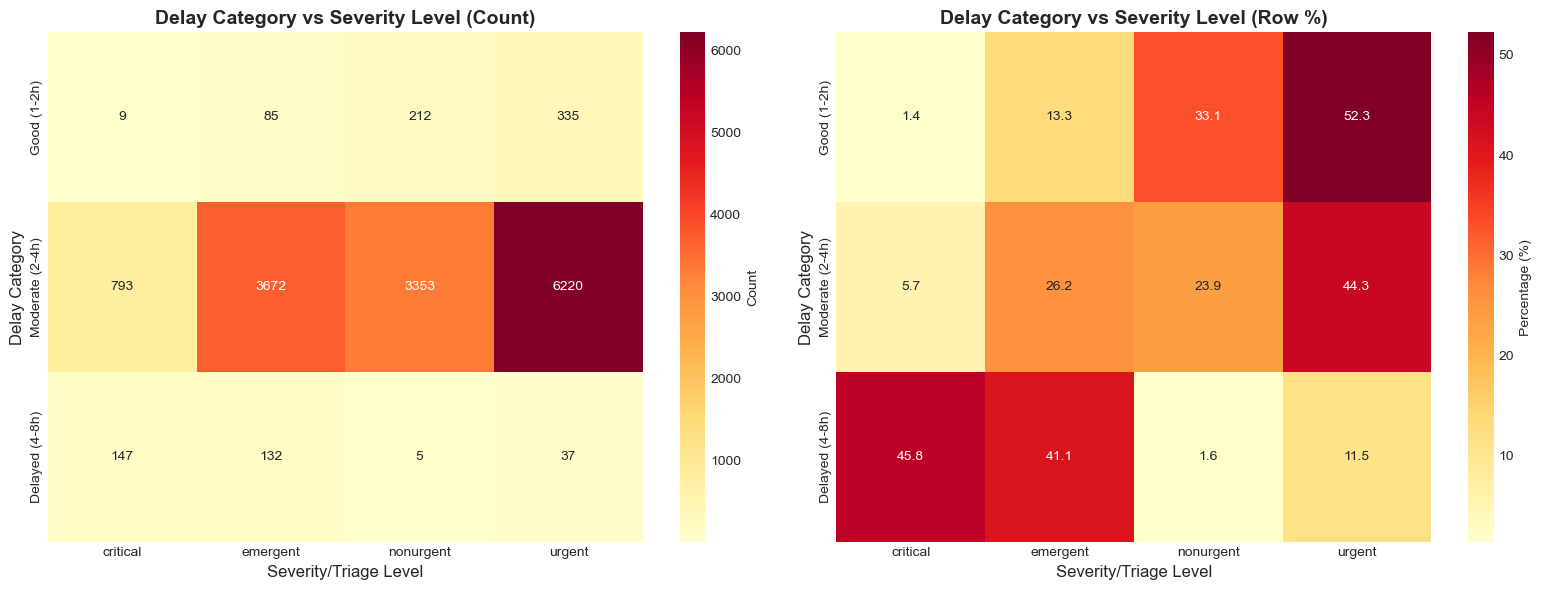

In [16]:
# ============================================================================
# RELATIONSHIP ANALYSIS: DELAY CATEGORY, SEVERITY & PATIENT SATISFACTION
# ============================================================================

print("=" * 80)
print("DELAY CATEGORY, SEVERITY & PATIENT SATISFACTION RELATIONSHIPS")
print("=" * 80)

# Find patient satisfaction/rating column - more comprehensive search
satisfaction_col = None
for col in df.columns:
    col_lower = col.lower().strip()
    # Check for various satisfaction/rating column name patterns
    if any(term in col_lower for term in ['satisfaction', 'rating', 'feedback', 'score', 'review', 'rate']):
        satisfaction_col = col
        break

# If not found, try exact matches
if satisfaction_col is None:
    possible_names = ['Patient Satisfaction', 'Satisfaction', 'Rating', 'Patient_Rating', 
                     'Feedback', 'Patient_Feedback', 'Score', 'Patient_Score']
    for name in possible_names:
        if name in df.columns:
            satisfaction_col = name
            break

# Find severity/triage level column - improved detection
severity_col = None
for col in df.columns:
    col_lower = col.lower().strip()
    # Look for triage level, severity level, etc.
    if ('triage' in col_lower and 'level' in col_lower) or \
       ('severity' in col_lower) or \
       (col_lower == 'triage level') or \
       (col_lower == 'severity level'):
        severity_col = col
        break

# If not found with 'level', try just 'triage'
if severity_col is None:
    for col in df.columns:
        col_lower = col.lower().strip()
        if 'triage' in col_lower and col_lower != 'triage start' and col_lower != 'triage end':
            severity_col = col
            break

print(f"\nIdentified columns:")
print(f"  Delay Category: {'Delay_Category' if 'Delay_Category' in df.columns else 'Not found'}")
print(f"  Severity/Triage Level: {severity_col if severity_col else 'Not found'}")
print(f"  Patient Satisfaction/Rating: {satisfaction_col if satisfaction_col else 'Not found'}")

# Show all column names for debugging
if satisfaction_col is None or severity_col is None:
    print("\nAll available columns in dataset:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")

# Check if we have the required columns
has_delay = 'Delay_Category' in df.columns
has_severity = severity_col is not None and severity_col in df.columns
has_satisfaction = satisfaction_col is not None and satisfaction_col in df.columns

if not has_delay:
    print("\n⚠ Delay_Category not found. Make sure Section 3 ran successfully.")
if not has_severity:
    print("⚠ Severity/Triage Level column not found.")
if not has_satisfaction:
    print("⚠ Patient Satisfaction/Rating column not found.")

# ============================================================================
# CROSS-TABULATION ANALYSIS
# ============================================================================

if has_delay and has_severity:
    print("\n" + "=" * 80)
    print("DELAY CATEGORY vs SEVERITY LEVEL - CROSS TABULATION")
    print("=" * 80)
    
    try:
        # Filter out any NaN values before creating crosstab
        df_clean = df[['Delay_Category', severity_col]].dropna()
        
        if len(df_clean) > 0:
            # Create cross-tabulation
            delay_severity_crosstab = pd.crosstab(df_clean['Delay_Category'], df_clean[severity_col], margins=True)
            print("\nCount Table:")
            display(delay_severity_crosstab)
            
            # Percentage table (row percentages)
            delay_severity_pct = pd.crosstab(df_clean['Delay_Category'], df_clean[severity_col], normalize='index') * 100
            delay_severity_pct = delay_severity_pct.round(2)
            print("\nPercentage Table (Row % - within each Delay Category):")
            display(delay_severity_pct)
            
            # Visualize only if we have data
            if len(delay_severity_crosstab) > 1 and len(delay_severity_crosstab.columns) > 1:
                fig, axes = plt.subplots(1, 2, figsize=(16, 6))
                
                # Count heatmap (exclude margins row/column)
                crosstab_data = delay_severity_crosstab.iloc[:-1, :-1]
                if crosstab_data.shape[0] > 0 and crosstab_data.shape[1] > 0:
                    sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='YlOrRd', 
                               ax=axes[0], cbar_kws={'label': 'Count'})
                    axes[0].set_title('Delay Category vs Severity Level (Count)', fontsize=14, fontweight='bold')
                    axes[0].set_xlabel('Severity/Triage Level', fontsize=12)
                    axes[0].set_ylabel('Delay Category', fontsize=12)
                    
                    # Percentage heatmap
                    sns.heatmap(delay_severity_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
                               ax=axes[1], cbar_kws={'label': 'Percentage (%)'})
                    axes[1].set_title('Delay Category vs Severity Level (Row %)', fontsize=14, fontweight='bold')
                    axes[1].set_xlabel('Severity/Triage Level', fontsize=12)
                    axes[1].set_ylabel('Delay Category', fontsize=12)
                    
                    plt.tight_layout()
                    plt.show()
                
                findings['insights'].append(
                    f"Delay-Severity relationship: {len(delay_severity_crosstab)-1} delay categories × "
                    f"{len(delay_severity_crosstab.columns)-1} severity levels"
                )
            else:
                print("⚠ Not enough data for visualization")
        else:
            print("⚠ No valid data after removing missing values")
    except Exception as e:
        print(f"⚠ Error creating cross-tabulation: {e}")
        import traceback
        traceback.print_exc()

# DELAY CATEGORY vs PATIENT SATISFACTION
if has_delay and has_satisfaction:
    print("\n" + "=" * 80)
    print("DELAY CATEGORY vs PATIENT SATISFACTION - RELATIONSHIP")
    print("=" * 80)
    
    try:
        # Check if satisfaction is numeric or categorical
        if df[satisfaction_col].dtype in [np.number]:
            # Numeric rating - calculate statistics by delay category
            delay_satisfaction_stats = df.groupby('Delay_Category')[satisfaction_col].agg(['mean', 'median', 'count', 'std'])
            delay_satisfaction_stats = delay_satisfaction_stats.sort_values('mean', ascending=False)
            
            print("\nPatient Satisfaction Statistics by Delay Category:")
            display(delay_satisfaction_stats)
            
            # Visualize
            fig, axes = plt.subplots(2, 1, figsize=(14, 10))
            
            # Average satisfaction by delay category
            axes[0].bar(range(len(delay_satisfaction_stats)), delay_satisfaction_stats['mean'], 
                       color='steelblue', alpha=0.7)
            axes[0].set_xticks(range(len(delay_satisfaction_stats)))
            axes[0].set_xticklabels(delay_satisfaction_stats.index, rotation=45, ha='right')
            axes[0].set_ylabel('Average Satisfaction Rating', fontsize=12)
            axes[0].set_title('Average Patient Satisfaction by Delay Category', fontsize=14, fontweight='bold')
            axes[0].grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, (idx, row) in enumerate(delay_satisfaction_stats.iterrows()):
                axes[0].text(i, row['mean'], f"{row['mean']:.2f}", 
                            ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            # Box plot
            delay_categories = df['Delay_Category'].dropna().unique()
            data_for_box = [df[df['Delay_Category'] == cat][satisfaction_col].dropna() 
                           for cat in delay_categories if len(df[df['Delay_Category'] == cat]) > 0]
            
            axes[1].boxplot(data_for_box, labels=[cat for cat in delay_categories if len(df[df['Delay_Category'] == cat]) > 0])
            axes[1].set_xticklabels([cat for cat in delay_categories if len(df[df['Delay_Category'] == cat]) > 0], 
                                   rotation=45, ha='right')
            axes[1].set_ylabel('Patient Satisfaction Rating', fontsize=12)
            axes[1].set_title('Distribution of Satisfaction Ratings by Delay Category', fontsize=14, fontweight='bold')
            axes[1].grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            plt.show()
            
            # Correlation between length of stay and satisfaction
            if 'Length_of_Stay_Hours' in df.columns:
                correlation = df['Length_of_Stay_Hours'].corr(df[satisfaction_col])
                print(f"\nCorrelation between Length of Stay and Satisfaction: {correlation:.3f}")
                if correlation < -0.2:
                    findings['insights'].append(
                        f"Strong negative correlation ({correlation:.3f}) between length of stay and satisfaction - "
                        f"shorter stays correlate with higher satisfaction"
                    )
                elif correlation > 0.2:
                    findings['insights'].append(
                        f"Positive correlation ({correlation:.3f}) between length of stay and satisfaction - "
                        f"longer stays correlate with higher satisfaction (may indicate more serious cases)"
                    )
            
            # Identify best and worst delay categories for satisfaction
            best_delay = delay_satisfaction_stats['mean'].idxmax()
            worst_delay = delay_satisfaction_stats['mean'].idxmin()
            findings['insights'].append(
                f"Highest satisfaction: {best_delay} (avg: {delay_satisfaction_stats.loc[best_delay, 'mean']:.2f})"
            )
            findings['insights'].append(
                f"Lowest satisfaction: {worst_delay} (avg: {delay_satisfaction_stats.loc[worst_delay, 'mean']:.2f})"
            )
        else:
            # Categorical satisfaction - create cross-tabulation
            df_sat_clean = df[['Delay_Category', satisfaction_col]].dropna()
            if len(df_sat_clean) > 0:
                delay_satisfaction_crosstab = pd.crosstab(df_sat_clean['Delay_Category'], df_sat_clean[satisfaction_col], margins=True)
                print("\nCount Table:")
                display(delay_satisfaction_crosstab)
    except Exception as e:
        print(f"⚠ Error analyzing delay-satisfaction relationship: {e}")
        import traceback
        traceback.print_exc()

# SEVERITY vs PATIENT SATISFACTION
if has_severity and has_satisfaction:
    print("\n" + "=" * 80)
    print("SEVERITY LEVEL vs PATIENT SATISFACTION - RELATIONSHIP")
    print("=" * 80)
    
    try:
        if df[satisfaction_col].dtype in [np.number]:
            df_sev_sat_clean = df[[severity_col, satisfaction_col]].dropna()
            if len(df_sev_sat_clean) > 0:
                severity_satisfaction_stats = df_sev_sat_clean.groupby(severity_col)[satisfaction_col].agg(['mean', 'median', 'count', 'std'])
                severity_satisfaction_stats = severity_satisfaction_stats.sort_values('mean', ascending=False)
                
                print("\nPatient Satisfaction Statistics by Severity Level:")
                display(severity_satisfaction_stats)
                
                # Visualize
                if len(severity_satisfaction_stats) > 0:
                    plt.figure(figsize=(12, 6))
                    severity_satisfaction_stats['mean'].plot(kind='bar', color='coral', alpha=0.7)
                    plt.title('Average Patient Satisfaction by Severity/Triage Level', fontsize=14, fontweight='bold')
                    plt.xlabel('Severity/Triage Level', fontsize=12)
                    plt.ylabel('Average Satisfaction Rating', fontsize=12)
                    plt.xticks(rotation=45, ha='right')
                    plt.grid(True, alpha=0.3, axis='y')
                    plt.tight_layout()
                    plt.show()
        else:
            print(f"⚠ Satisfaction column '{satisfaction_col}' is not numeric")
    except Exception as e:
        print(f"⚠ Error analyzing severity-satisfaction relationship: {e}")
        import traceback
        traceback.print_exc()

# ============================================================================
# COMPREHENSIVE 3-WAY RELATIONSHIP TABLE
# ============================================================================

if has_delay and has_severity and has_satisfaction:
    print("\n" + "=" * 80)
    print("COMPREHENSIVE 3-WAY RELATIONSHIP: DELAY × SEVERITY × SATISFACTION")
    print("=" * 80)
    
    try:
        if df[satisfaction_col].dtype in [np.number]:
            # Filter out missing values
            df_3way = df[['Delay_Category', severity_col, satisfaction_col]].dropna()
            
            if len(df_3way) > 0:
                # Create comprehensive pivot table
                comprehensive_table = df_3way.groupby(['Delay_Category', severity_col])[satisfaction_col].agg([
                    'mean', 'count', 'median'
                ]).round(2)
                comprehensive_table.columns = ['Avg_Satisfaction', 'Count', 'Median_Satisfaction']
                comprehensive_table = comprehensive_table.reset_index()
                
                # Pivot for better visualization
                pivot_table = df_3way.pivot_table(
                    values=satisfaction_col,
                    index='Delay_Category',
                    columns=severity_col,
                    aggfunc=['mean', 'count'],
                    fill_value=0
                )
                
                print("\nAverage Satisfaction by Delay Category and Severity Level:")
                if 'mean' in pivot_table.columns.levels[0]:
                    display(pivot_table['mean'].round(2))
                
                print("\nPatient Count by Delay Category and Severity Level:")
                if 'count' in pivot_table.columns.levels[0]:
                    display(pivot_table['count'])
                
                # Create heatmap only if we have valid data
                if 'mean' in pivot_table.columns.levels[0] and len(pivot_table['mean']) > 0:
                    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
                    
                    # Satisfaction heatmap
                    mean_data = pivot_table['mean']
                    if mean_data.shape[0] > 0 and mean_data.shape[1] > 0:
                        sns.heatmap(mean_data, annot=True, fmt='.2f', cmap='RdYlGn', 
                                   center=mean_data.values[mean_data.values > 0].mean() if (mean_data.values > 0).any() else 3, 
                                   ax=axes[0], cbar_kws={'label': 'Avg Satisfaction'}, 
                                   vmin=mean_data.values[mean_data.values > 0].min() if (mean_data.values > 0).any() else 1, 
                                   vmax=mean_data.values.max() if (mean_data.values > 0).any() else 5)
                        axes[0].set_title('Average Satisfaction: Delay Category × Severity Level', 
                                         fontsize=14, fontweight='bold')
                        axes[0].set_xlabel('Severity/Triage Level', fontsize=12)
                        axes[0].set_ylabel('Delay Category', fontsize=12)
                        
                        # Count heatmap
                        count_data = pivot_table['count']
                        sns.heatmap(count_data, annot=True, fmt='d', cmap='YlOrRd', 
                                   ax=axes[1], cbar_kws={'label': 'Patient Count'})
                        axes[1].set_title('Patient Count: Delay Category × Severity Level', 
                                         fontsize=14, fontweight='bold')
                        axes[1].set_xlabel('Severity/Triage Level', fontsize=12)
                        axes[1].set_ylabel('Delay Category', fontsize=12)
                        
                        plt.tight_layout()
                        plt.show()
                
                # Summary insights
                print("\n" + "-" * 80)
                print("KEY INSIGHTS FROM 3-WAY RELATIONSHIP")
                print("-" * 80)
                
                # Find best combination (highest satisfaction) - with error handling
                try:
                    if len(comprehensive_table) > 0:
                        best_idx = comprehensive_table['Avg_Satisfaction'].idxmax()
                        best_combo = comprehensive_table.loc[best_idx]
                        print(f"\nBest combination (Highest Satisfaction):")
                        print(f"  Delay Category: {best_combo['Delay_Category']}")
                        print(f"  Severity Level: {best_combo[severity_col]}")
                        print(f"  Average Satisfaction: {best_combo['Avg_Satisfaction']:.2f}")
                        print(f"  Patient Count: {int(best_combo['Count'])}")
                        
                        # Find worst combination (lowest satisfaction)
                        worst_idx = comprehensive_table['Avg_Satisfaction'].idxmin()
                        worst_combo = comprehensive_table.loc[worst_idx]
                        print(f"\nWorst combination (Lowest Satisfaction):")
                        print(f"  Delay Category: {worst_combo['Delay_Category']}")
                        print(f"  Severity Level: {worst_combo[severity_col]}")
                        print(f"  Average Satisfaction: {worst_combo['Avg_Satisfaction']:.2f}")
                        print(f"  Patient Count: {int(worst_combo['Count'])}")
                        
                        findings['insights'].append(
                            f"Best satisfaction: {best_combo['Delay_Category']} + {best_combo[severity_col]} "
                            f"(avg: {best_combo['Avg_Satisfaction']:.2f})"
                        )
                        findings['insights'].append(
                            f"Worst satisfaction: {worst_combo['Delay_Category']} + {worst_combo[severity_col]} "
                            f"(avg: {worst_combo['Avg_Satisfaction']:.2f})"
                        )
                except Exception as e:
                    print(f"⚠ Error finding best/worst combinations: {e}")
            else:
                print("⚠ No valid data after removing missing values for 3-way analysis")
        else:
            print(f"⚠ Satisfaction column '{satisfaction_col}' is not numeric - cannot create 3-way pivot")
    except Exception as e:
        print(f"⚠ Error in 3-way relationship analysis: {e}")
        import traceback
        traceback.print_exc()


## Section 4: Time-Based Patterns & Peak Analysis


TIME-BASED PATTERNS & PEAK ANALYSIS

--------------------------------------------------------------------------------
HOURLY ARRIVAL PATTERNS
--------------------------------------------------------------------------------


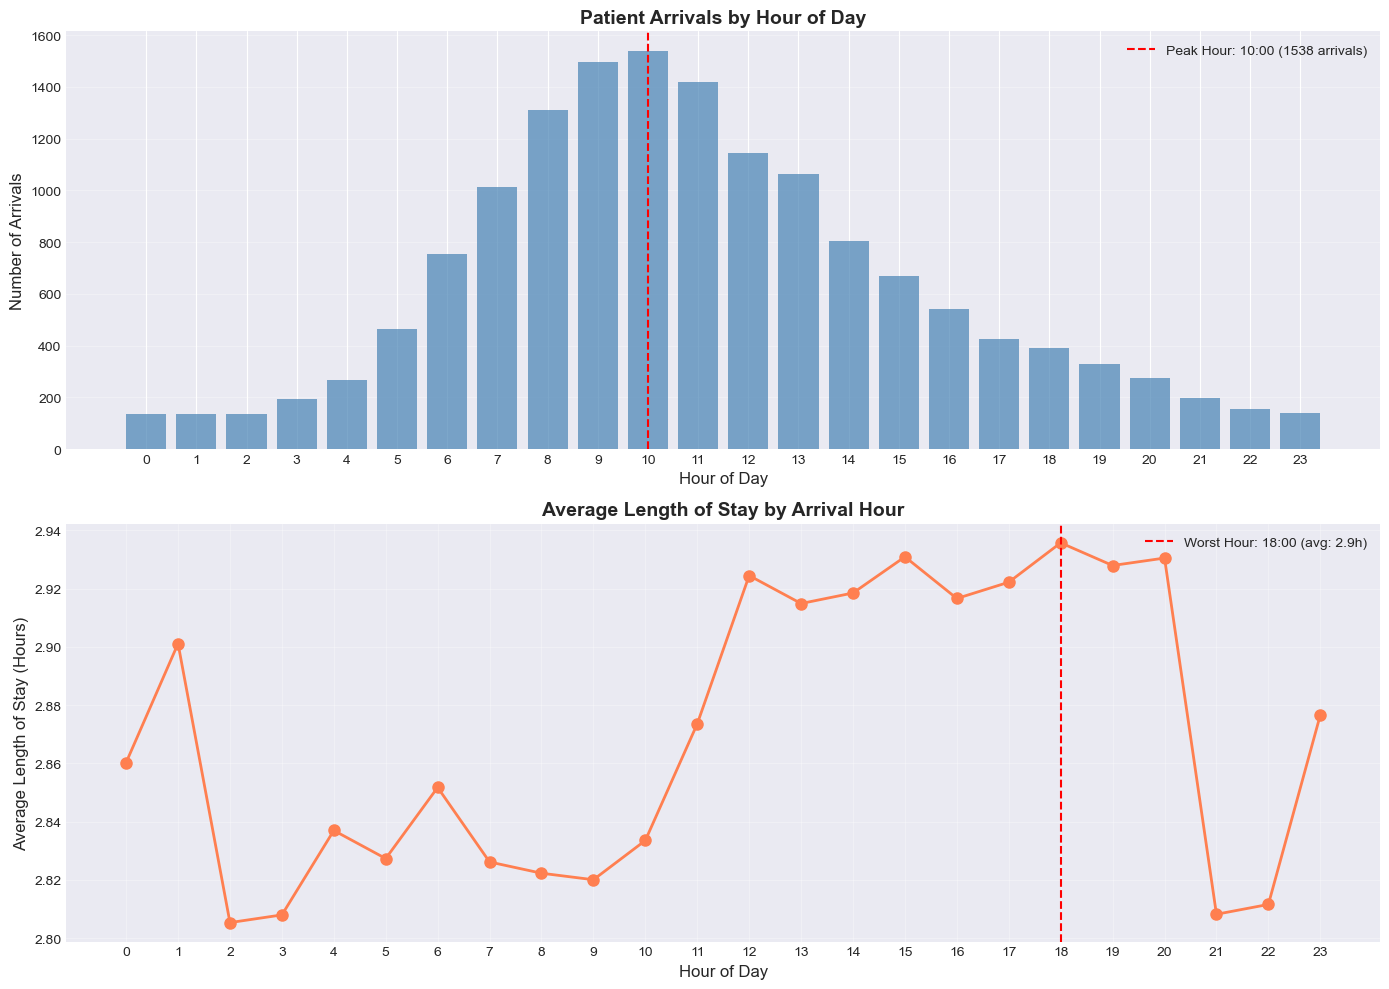


--------------------------------------------------------------------------------
DAY OF WEEK PATTERNS
--------------------------------------------------------------------------------


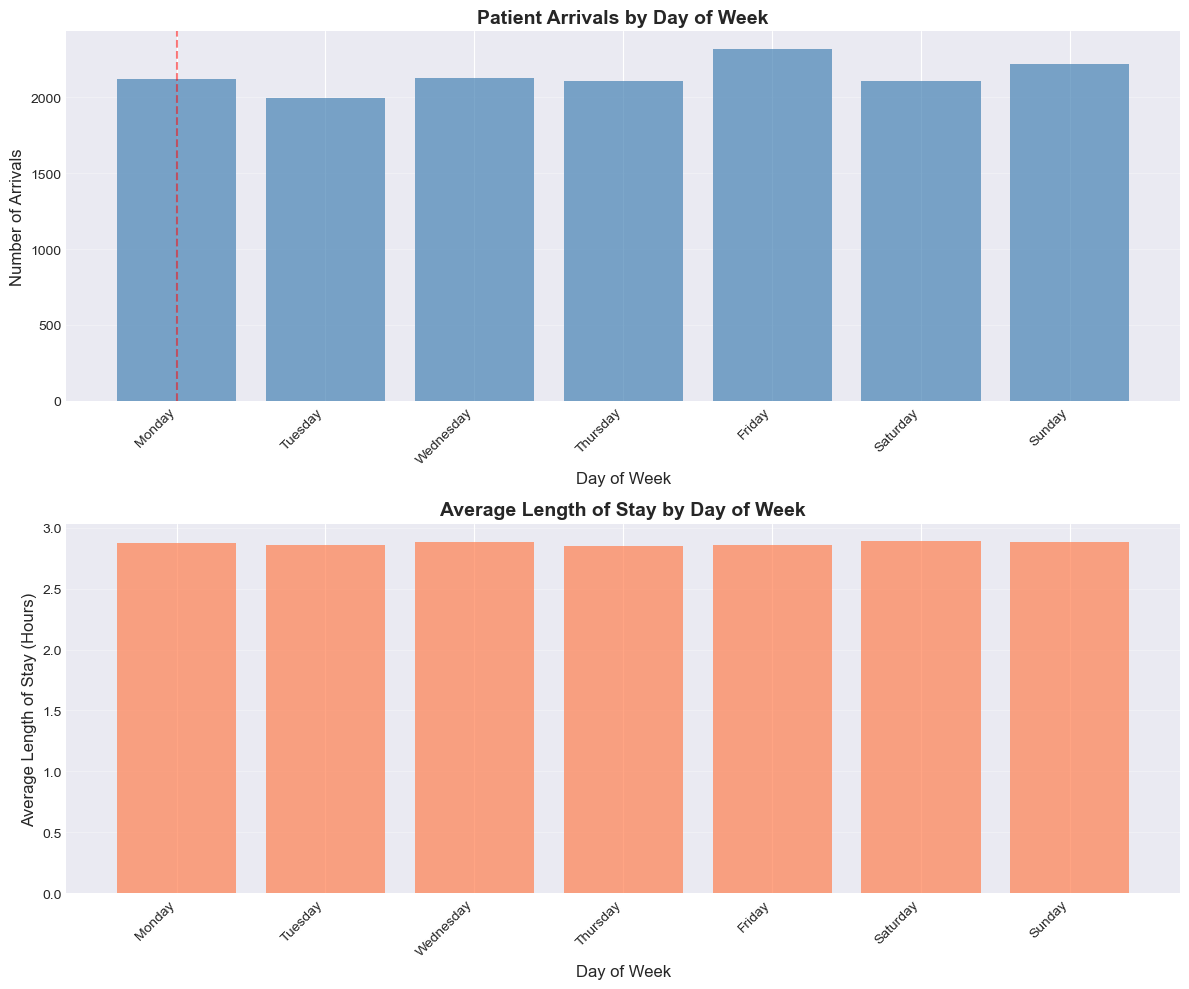


--------------------------------------------------------------------------------
MONTHLY/SEASONAL PATTERNS
--------------------------------------------------------------------------------


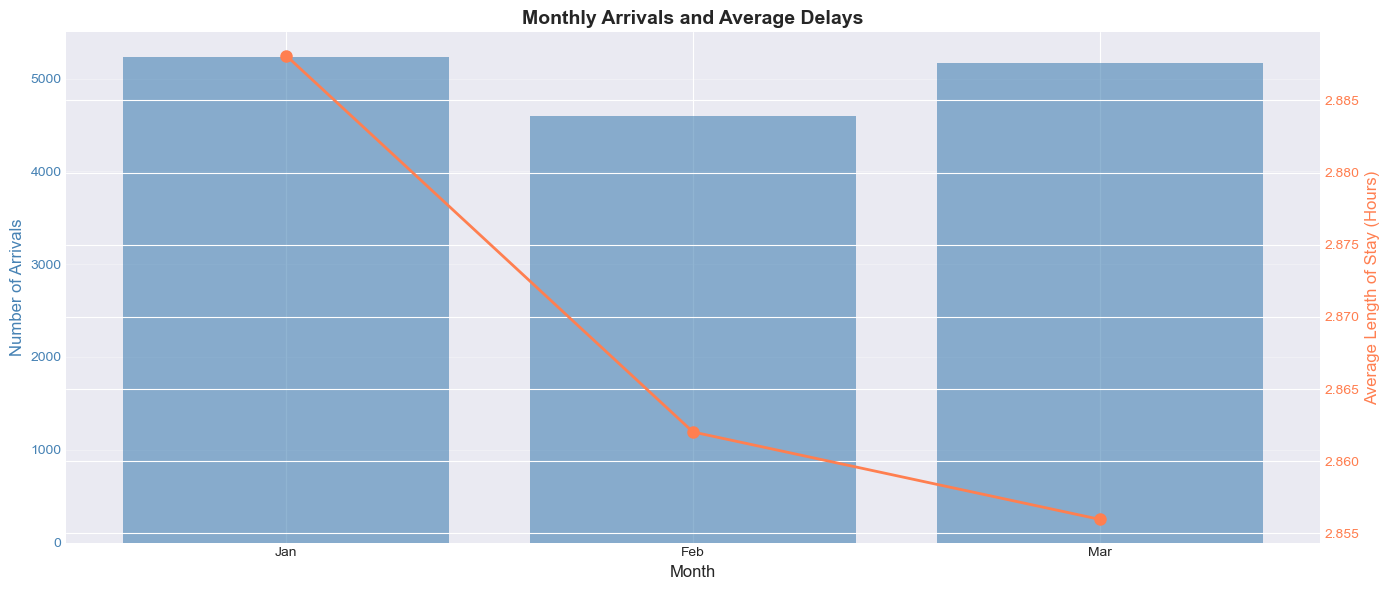

In [ ]:
# ============================================================================
# TIME-BASED PATTERNS
# ============================================================================

print("=" * 80)
print("TIME-BASED PATTERNS & PEAK ANALYSIS")
print("=" * 80)

# Hourly patterns
if 'Arrival_Hour' in df.columns:
    print("\n" + "-" * 80)
    print("HOURLY ARRIVAL PATTERNS")
    print("-" * 80)
    
    hourly_arrivals = df.groupby('Arrival_Hour').size()
    hourly_delays = df.groupby('Arrival_Hour')['Length_of_Stay_Hours'].mean() if 'Length_of_Stay_Hours' in df.columns else None
    
    # Visualize hourly arrivals
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Arrivals by hour
    axes[0].bar(hourly_arrivals.index, hourly_arrivals.values, color='steelblue', alpha=0.7)
    axes[0].set_title('Patient Arrivals by Hour of Day', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Hour of Day', fontsize=12)
    axes[0].set_ylabel('Number of Arrivals', fontsize=12)
    axes[0].set_xticks(range(0, 24))
    axes[0].grid(True, alpha=0.3, axis='y')
    
    peak_hour = hourly_arrivals.idxmax()
    axes[0].axvline(peak_hour, color='red', linestyle='--', 
                   label=f'Peak Hour: {peak_hour}:00 ({hourly_arrivals.max()} arrivals)')
    axes[0].legend()
    
    # Average delays by hour (if available)
    if hourly_delays is not None:
        axes[1].plot(hourly_delays.index, hourly_delays.values, marker='o', 
                    color='coral', linewidth=2, markersize=8)
        axes[1].set_title('Average Length of Stay by Arrival Hour', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Hour of Day', fontsize=12)
        axes[1].set_ylabel('Average Length of Stay (Hours)', fontsize=12)
        axes[1].set_xticks(range(0, 24))
        axes[1].grid(True, alpha=0.3)
        
        worst_hour = hourly_delays.idxmax()
        axes[1].axvline(worst_hour, color='red', linestyle='--', 
                       label=f'Worst Hour: {worst_hour}:00 (avg: {hourly_delays.max():.1f}h)')
        axes[1].legend()
        
        findings['insights'].append(f"Peak arrival hour: {peak_hour}:00 with {hourly_arrivals.max()} arrivals")
        findings['delays'].append(f"Longest delays occur at {worst_hour}:00 (avg: {hourly_delays.max():.1f}h)")
    
    plt.tight_layout()
    plt.show()

# Day of week patterns
if 'Arrival_DayOfWeek' in df.columns:
    print("\n" + "-" * 80)
    print("DAY OF WEEK PATTERNS")
    print("-" * 80)
    
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['Day_Name'] = df['Arrival_DayOfWeek'].map(lambda x: day_names[x] if pd.notna(x) else None)
    
    daily_arrivals = df.groupby('Day_Name').size()
    daily_delays = df.groupby('Day_Name')['Length_of_Stay_Hours'].mean() if 'Length_of_Stay_Hours' in df.columns else None
    
    # Visualize
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Arrivals by day
    day_order = day_names
    daily_arrivals_ordered = daily_arrivals.reindex(day_order)
    axes[0].bar(range(len(day_order)), daily_arrivals_ordered.values, color='steelblue', alpha=0.7)
    axes[0].set_title('Patient Arrivals by Day of Week', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Day of Week', fontsize=12)
    axes[0].set_ylabel('Number of Arrivals', fontsize=12)
    axes[0].set_xticks(range(len(day_order)))
    axes[0].set_xticklabels(day_order, rotation=45, ha='right')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    busiest_day = daily_arrivals_ordered.idxmax()
    axes[0].axvline(daily_arrivals_ordered.idxmax(), color='red', linestyle='--', alpha=0.5)
    
    # Delays by day
    if daily_delays is not None:
        daily_delays_ordered = daily_delays.reindex(day_order)
        axes[1].bar(range(len(day_order)), daily_delays_ordered.values, color='coral', alpha=0.7)
        axes[1].set_title('Average Length of Stay by Day of Week', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Day of Week', fontsize=12)
        axes[1].set_ylabel('Average Length of Stay (Hours)', fontsize=12)
        axes[1].set_xticks(range(len(day_order)))
        axes[1].set_xticklabels(day_order, rotation=45, ha='right')
        axes[1].grid(True, alpha=0.3, axis='y')
        
        worst_day = daily_delays_ordered.idxmax()
        findings['delays'].append(f"Busiest day: {busiest_day} with {daily_arrivals_ordered.max()} arrivals")
        findings['delays'].append(f"Longest delays on: {worst_day} (avg: {daily_delays_ordered.max():.1f}h)")
    
    plt.tight_layout()
    plt.show()

# Exit patterns by hour
if discharge_col and discharge_col in df.columns:
    print("\n" + "-" * 80)
    print("HOURLY EXIT PATTERNS (All Dispositions)")
    print("-" * 80)
    
    # Extract exit hour from discharge/exit time
    if df[discharge_col].dtype == 'datetime64[ns]':
        df['Exit_Hour'] = df[discharge_col].dt.hour
        
        # Count exits by hour
        hourly_exits = df.groupby('Exit_Hour').size()
        
        # Compare arrivals vs exits
        fig, axes = plt.subplots(3, 1, figsize=(14, 14))
        
        # Exits by hour
        axes[0].bar(hourly_exits.index, hourly_exits.values, color='coral', alpha=0.7)
        axes[0].set_title('ER Exits by Hour of Day (All Dispositions)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Hour of Day', fontsize=12)
        axes[0].set_ylabel('Number of Exits', fontsize=12)
        axes[0].set_xticks(range(0, 24))
        axes[0].grid(True, alpha=0.3, axis='y')
        
        peak_exit_hour = hourly_exits.idxmax()
        axes[0].axvline(peak_exit_hour, color='red', linestyle='--', 
                       label=f'Peak Exit Hour: {peak_exit_hour}:00 ({hourly_exits.max()} exits)')
        axes[0].legend()
        
        # Arrivals by hour (for comparison)
        if 'Arrival_Hour' in df.columns:
            hourly_arrivals = df.groupby('Arrival_Hour').size()
            axes[1].bar(hourly_arrivals.index, hourly_arrivals.values, color='steelblue', alpha=0.7)
            axes[1].set_title('ER Arrivals by Hour of Day (for comparison)', fontsize=14, fontweight='bold')
            axes[1].set_xlabel('Hour of Day', fontsize=12)
            axes[1].set_ylabel('Number of Arrivals', fontsize=12)
            axes[1].set_xticks(range(0, 24))
            axes[1].grid(True, alpha=0.3, axis='y')
            
            peak_arrival_hour = hourly_arrivals.idxmax()
            axes[1].axvline(peak_arrival_hour, color='red', linestyle='--', 
                           label=f'Peak Arrival Hour: {peak_arrival_hour}:00 ({hourly_arrivals.max()} arrivals)')
            axes[1].legend()
            
            # Overlay comparison
            axes[2].plot(hourly_arrivals.index, hourly_arrivals.values, marker='o', 
                        color='steelblue', linewidth=2, markersize=8, label='Arrivals', alpha=0.7)
            axes[2].plot(hourly_exits.index, hourly_exits.values, marker='s', 
                        color='coral', linewidth=2, markersize=8, label='Exits', alpha=0.7)
            axes[2].set_title('ER Arrivals vs Exits by Hour of Day', fontsize=14, fontweight='bold')
            axes[2].set_xlabel('Hour of Day', fontsize=12)
            axes[2].set_ylabel('Number of Patients', fontsize=12)
            axes[2].set_xticks(range(0, 24))
            axes[2].grid(True, alpha=0.3)
            axes[2].legend(fontsize=11)
            
            # Add insights
            findings['insights'].append(f"Peak exit hour: {peak_exit_hour}:00 with {hourly_exits.max()} exits")
            findings['insights'].append(f"Peak arrival hour: {peak_arrival_hour}:00 with {hourly_arrivals.max()} arrivals")
            
            # Identify hours with patient buildup (more arrivals than exits)
            hourly_net = hourly_arrivals - hourly_exits
            buildup_hours = hourly_net[hourly_net > 0].sort_values(ascending=False)
            if len(buildup_hours) > 0:
                top_buildup = buildup_hours.head(3)
                findings['bottlenecks'].append(
                    f"Hours with most patient buildup: {', '.join([f'{h}:00 (+{v} net)' for h, v in top_buildup.items()])}"
                )
        
        plt.tight_layout()
        plt.show()
        
        # Detailed hourly analysis table
        print("\n" + "-" * 80)
        print("DETAILED HOURLY FLOW ANALYSIS")
        print("-" * 80)
        
        if 'Arrival_Hour' in df.columns:
            hourly_analysis = pd.DataFrame({
                'Hour': range(0, 24),
                'Arrivals': [hourly_arrivals.get(h, 0) for h in range(24)],
                'Exits': [hourly_exits.get(h, 0) for h in range(24)]
            })
            hourly_analysis['Net_Change'] = hourly_analysis['Arrivals'] - hourly_analysis['Exits']
            hourly_analysis['Cumulative_Buildup'] = hourly_analysis['Net_Change'].cumsum()
            
            # Format hour as HH:00
            hourly_analysis['Hour'] = hourly_analysis['Hour'].apply(lambda x: f'{x:02d}:00')
            
            print("\nHourly Patient Flow (Arrivals vs Exits):")
            display(hourly_analysis)
            
            # Identify critical hours
            high_net = hourly_analysis.nlargest(5, 'Net_Change')
            print(f"\n⚠ Top 5 hours with highest patient buildup:")
            for idx, row in high_net.iterrows():
                print(f"  {row['Hour']}: +{row['Net_Change']} patients (Arrivals: {row['Arrivals']}, Exits: {row['Exits']})")
    else:
        print(f"\n⚠ {discharge_col} is not a datetime column - cannot extract exit hour")
else:
    print("\n⚠ Exit/Discharge time column not found - cannot analyze exit patterns")

# Monthly/Seasonal patterns
if 'Arrival_Month' in df.columns:
    print("\n" + "-" * 80)
    print("MONTHLY/SEASONAL PATTERNS")
    print("-" * 80)
    
    monthly_arrivals = df.groupby('Arrival_Month').size()
    monthly_delays = df.groupby('Arrival_Month')['Length_of_Stay_Hours'].mean() if 'Length_of_Stay_Hours' in df.columns else None
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.figure(figsize=(14, 6))
    if monthly_delays is not None:
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        
        ax1.bar(monthly_arrivals.index, monthly_arrivals.values, alpha=0.6, color='steelblue', label='Arrivals')
        ax1.set_xlabel('Month', fontsize=12)
        ax1.set_ylabel('Number of Arrivals', fontsize=12, color='steelblue')
        ax1.tick_params(axis='y', labelcolor='steelblue')
        ax1.set_xticks(range(1, 13))
        ax1.set_xticklabels(month_names)
        ax1.grid(True, alpha=0.3, axis='y')
        
        ax2.plot(monthly_delays.index, monthly_delays.values, marker='o', 
                color='coral', linewidth=2, markersize=8, label='Avg Delay')
        ax2.set_ylabel('Average Length of Stay (Hours)', fontsize=12, color='coral')
        ax2.tick_params(axis='y', labelcolor='coral')
        
        plt.title('Monthly Arrivals and Average Delays', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        peak_month = monthly_arrivals.idxmax()
        worst_month = monthly_delays.idxmax()
        findings['insights'].append(f"Peak month: {month_names[peak_month-1]} with {monthly_arrivals.max()} arrivals")
        findings['delays'].append(f"Longest delays in: {month_names[worst_month-1]} (avg: {monthly_delays.max():.1f}h)")


## Section 5: Staffing Efficiency Analysis


STAFFING EFFICIENCY ANALYSIS

Found staffing columns: ['Doctor Seen']

--------------------------------------------------------------------------------
STAFFING OPTIMIZATION OPPORTUNITIES
--------------------------------------------------------------------------------

Top 5 hours with highest staffing stress (high volume + high delays):


,Avg_Delay,Patient_Count,Stress_Score
Arrival_Hour,,,
10,2.83,1538,0.981293
9,2.82,1497,0.966263
11,2.87,1420,0.949734
8,2.82,1311,0.905795
12,2.92,1146,0.869160


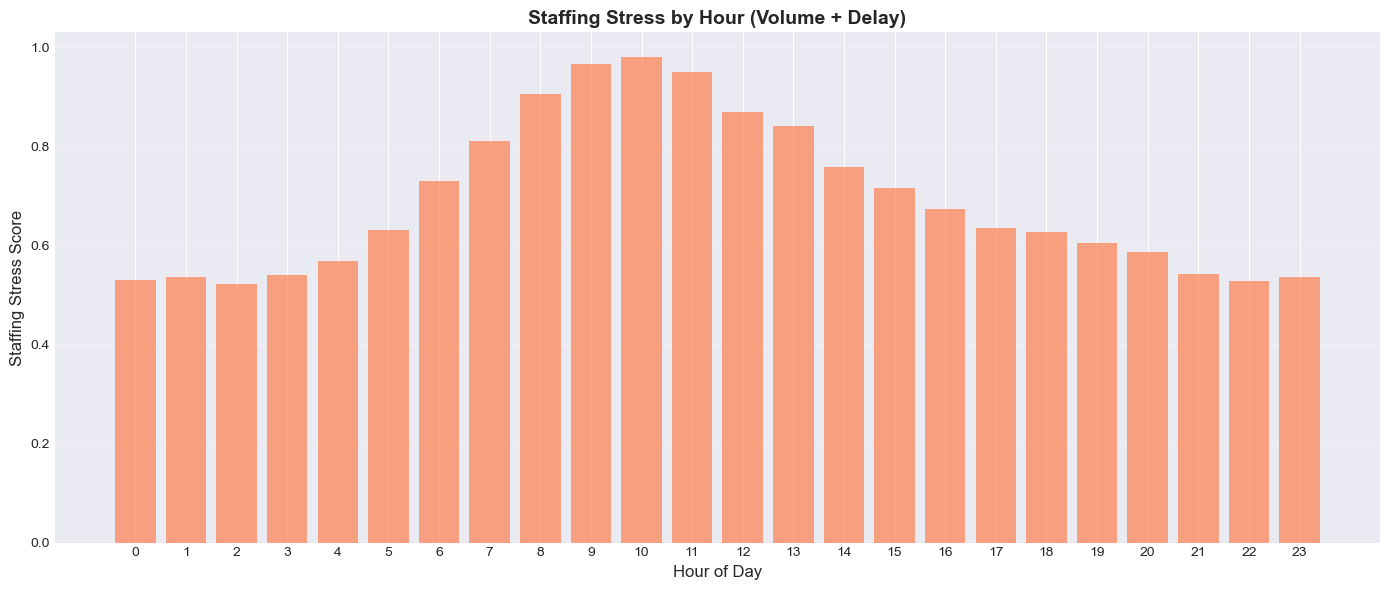

In [8]:
# ============================================================================
# STAFFING EFFICIENCY ANALYSIS
# ============================================================================

print("=" * 80)
print("STAFFING EFFICIENCY ANALYSIS")
print("=" * 80)

# Analyze staffing impact on throughput and delays
if len(staffing_cols) > 0:
    print(f"\nFound staffing columns: {staffing_cols}")
    
    # Analyze relationship between staffing and delays
    if 'Length_of_Stay_Hours' in df.columns:
        for col in staffing_cols:
            if col in df.columns:
                if df[col].dtype in [np.number]:
                    # Numerical staffing metric
                    correlation = df[col].corr(df['Length_of_Stay_Hours'])
                    print(f"\n{col} correlation with Length of Stay: {correlation:.3f}")
                    
                    if abs(correlation) > 0.3:
                        findings['insights'].append(
                            f"Staffing metric {col} shows {'negative' if correlation < 0 else 'positive'} "
                            f"correlation ({correlation:.3f}) with length of stay"
                        )
                    
                    # Visualize relationship
                    plt.figure(figsize=(12, 6))
                    plt.scatter(df[col], df['Length_of_Stay_Hours'], alpha=0.5, s=20)
                    plt.xlabel(col, fontsize=12)
                    plt.ylabel('Length of Stay (Hours)', fontsize=12)
                    plt.title(f'Staffing Impact: {col} vs Length of Stay', fontsize=14, fontweight='bold')
                    plt.grid(True, alpha=0.3)
                    
                    # Add trend line
                    z = np.polyfit(df[col].dropna(), df.loc[df[col].notna(), 'Length_of_Stay_Hours'], 1)
                    p = np.poly1d(z)
                    plt.plot(df[col].dropna().sort_values(), 
                            p(df[col].dropna().sort_values()), "r--", alpha=0.8, linewidth=2)
                    plt.tight_layout()
                    plt.show()
                    
                elif df[col].dtype in ['object', 'category']:
                    # Categorical staffing (e.g., staffing level categories)
                    if df[col].nunique() < 10:
                        staffing_delays = df.groupby(col)['Length_of_Stay_Hours'].agg(['mean', 'median', 'count'])
                        staffing_delays = staffing_delays.sort_values('mean', ascending=False)
                        
                        print(f"\n{col} impact on delays:")
                        display(staffing_delays)
                        
                        # Visualize
                        plt.figure(figsize=(12, 6))
                        staffing_delays['mean'].plot(kind='bar', color='steelblue')
                        plt.title(f'Average Length of Stay by {col}', fontsize=14, fontweight='bold')
                        plt.xlabel(col, fontsize=12)
                        plt.ylabel('Average Length of Stay (Hours)', fontsize=12)
                        plt.xticks(rotation=45, ha='right')
                        plt.grid(True, alpha=0.3, axis='y')
                        plt.tight_layout()
                        plt.show()
                        
                        best_staffing = staffing_delays['mean'].idxmin()
                        worst_staffing = staffing_delays['mean'].idxmax()
                        findings['insights'].append(
                            f"Best performance with {col}={best_staffing} (avg: {staffing_delays.loc[best_staffing, 'mean']:.1f}h) "
                            f"vs worst: {worst_staffing} ({staffing_delays.loc[worst_staffing, 'mean']:.1f}h)"
                        )
else:
    print("\n⚠ No staffing columns found in dataset.")
    print("   If you have staffing data, ensure columns contain 'staff', 'nurse', 'doctor', etc.")

# Analyze patient-to-staff ratios (if we can calculate)
# This would require knowing both patient volume and staff counts
print("\n" + "-" * 80)
print("STAFFING OPTIMIZATION OPPORTUNITIES")
print("-" * 80)

# Identify peak hours when staffing might be insufficient
if 'Arrival_Hour' in df.columns and 'Length_of_Stay_Hours' in df.columns:
    hourly_analysis = df.groupby('Arrival_Hour').agg({
        'Length_of_Stay_Hours': ['mean', 'count']
    }).round(2)
    hourly_analysis.columns = ['Avg_Delay', 'Patient_Count']
    hourly_analysis = hourly_analysis.sort_values('Avg_Delay', ascending=False)
    
    # Identify hours with high patient volume AND high delays (staffing stress)
    hourly_analysis['Stress_Score'] = (
        (hourly_analysis['Patient_Count'] / hourly_analysis['Patient_Count'].max()) * 0.5 +
        (hourly_analysis['Avg_Delay'] / hourly_analysis['Avg_Delay'].max()) * 0.5
    )
    hourly_analysis = hourly_analysis.sort_values('Stress_Score', ascending=False)
    
    print("\nTop 5 hours with highest staffing stress (high volume + high delays):")
    display(hourly_analysis.head(5))
    
    worst_hours = hourly_analysis.head(3).index.tolist()
    findings['bottlenecks'].append(
        f"Highest staffing stress during hours: {worst_hours} "
        f"(high patient volume + extended delays)"
    )
    
    # Visualize
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(hourly_analysis.index, hourly_analysis['Stress_Score'], color='coral', alpha=0.7)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel('Staffing Stress Score', fontsize=12)
    ax.set_title('Staffing Stress by Hour (Volume + Delay)', fontsize=14, fontweight='bold')
    ax.set_xticks(range(0, 24))
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


## Section 6: Throughput Analysis & Processing Times


THROUGHPUT ANALYSIS & PROCESSING TIMES

--------------------------------------------------------------------------------
DAILY THROUGHPUT STATISTICS
--------------------------------------------------------------------------------
Average daily patients: 166.7
Median daily patients: 167.0
Min daily patients: 134
Max daily patients: 206
Std deviation: 13.9


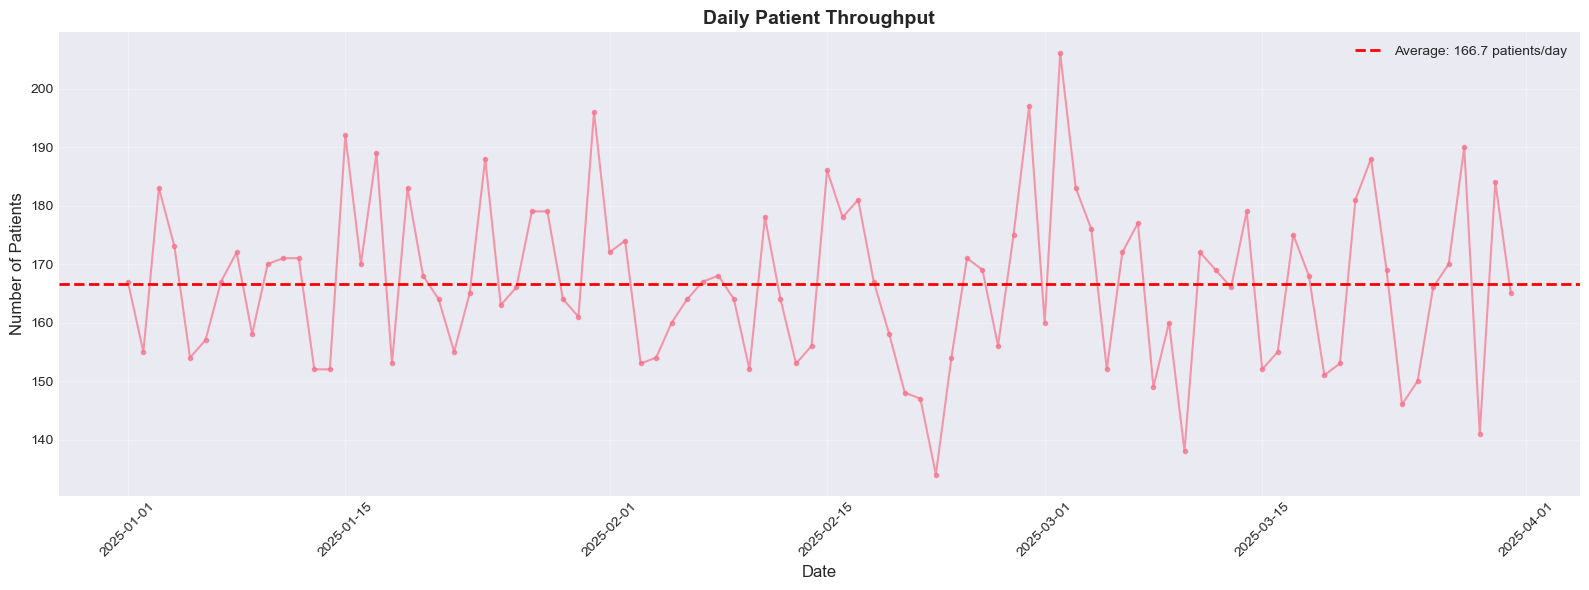


High volume days (>90th percentile, 184 patients): 9 days
Low volume days (<10th percentile, 152 patients): 9 days

--------------------------------------------------------------------------------
PROCESSING EFFICIENCY
--------------------------------------------------------------------------------
Average throughput efficiency: 0.361 patients/hour
Median: 0.351 patients/hour

Triage Level efficiency:


IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
# ============================================================================
# THROUGHPUT ANALYSIS
# ============================================================================

print("=" * 80)
print("THROUGHPUT ANALYSIS & PROCESSING TIMES")
print("=" * 80)

# Calculate throughput metrics
if arrival_col and df[arrival_col].notna().any():
    # Daily throughput
    daily_throughput = df.groupby('Arrival_Date').size()
    
    print("\n" + "-" * 80)
    print("DAILY THROUGHPUT STATISTICS")
    print("-" * 80)
    print(f"Average daily patients: {daily_throughput.mean():.1f}")
    print(f"Median daily patients: {daily_throughput.median():.1f}")
    print(f"Min daily patients: {daily_throughput.min()}")
    print(f"Max daily patients: {daily_throughput.max()}")
    print(f"Std deviation: {daily_throughput.std():.1f}")
    
    # Visualize daily throughput
    plt.figure(figsize=(16, 6))
    daily_throughput.plot(kind='line', marker='o', markersize=3, alpha=0.7)
    plt.axhline(daily_throughput.mean(), color='red', linestyle='--', 
               label=f'Average: {daily_throughput.mean():.1f} patients/day', linewidth=2)
    plt.title('Daily Patient Throughput', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    findings['insights'].append(f"Average daily throughput: {daily_throughput.mean():.1f} patients (range: {daily_throughput.min()}-{daily_throughput.max()})")
    
    # Identify days with unusually high/low throughput
    threshold_high = daily_throughput.quantile(0.90)
    threshold_low = daily_throughput.quantile(0.10)
    
    high_volume_days = daily_throughput[daily_throughput > threshold_high]
    low_volume_days = daily_throughput[daily_throughput < threshold_low]
    
    print(f"\nHigh volume days (>90th percentile, {threshold_high:.0f} patients): {len(high_volume_days)} days")
    print(f"Low volume days (<10th percentile, {threshold_low:.0f} patients): {len(low_volume_days)} days")

# Analyze processing efficiency
if 'Length_of_Stay_Hours' in df.columns:
    # Calculate efficiency metrics
    df['Throughput_Efficiency'] = 1 / df['Length_of_Stay_Hours']  # Patients per hour
    
    print("\n" + "-" * 80)
    print("PROCESSING EFFICIENCY")
    print("-" * 80)
    print(f"Average throughput efficiency: {df['Throughput_Efficiency'].mean():.3f} patients/hour")
    print(f"Median: {df['Throughput_Efficiency'].median():.3f} patients/hour")
    
    # Identify factors affecting throughput
    efficiency_analysis = {}
    
    for col in flow_cols[:5]:  # Analyze first 5 flow columns
        if col in df.columns and df[col].nunique() < 15:
            efficiency_by_cat = df.groupby(col)['Throughput_Efficiency'].mean().sort_values(ascending=False)
            efficiency_analysis[col] = efficiency_by_cat
            
            print(f"\n{col} efficiency:")
            print(f"  Best: {efficiency_by_cat.index[0]} ({efficiency_by_cat.iloc[0]:.3f} patients/hour)")
            print(f"  Worst: {efficiency_by_cat.index[-1]} ({efficiency_by_cat.iloc[-1]:.3f} patients/hour)")
            
            findings['insights'].append(
                f"{col}: Best throughput with {efficiency_by_cat.index[0]} "
                f"({efficiency_by_cat.iloc[0]:.3f} pts/hr) vs {efficiency_by_cat.index[-1]} "
                f"({efficiency_by_cat.iloc[-1]:.3f} pts/hr)"
            )

# Waiting time analysis (if we have wait time data)
wait_time_cols = [col for col in df.columns if 'wait' in col.lower()]
if wait_time_cols:
    print("\n" + "-" * 80)
    print("WAITING TIME ANALYSIS")
    print("-" * 80)
    
    for col in wait_time_cols:
        if df[col].dtype in [np.number]:
            print(f"\n{col}:")
            print(f"  Mean: {df[col].mean():.2f}")
            print(f"  Median: {df[col].median():.2f}")
            print(f"  90th percentile: {df[col].quantile(0.90):.2f}")
            
            # Identify excessive wait times
            wait_threshold = df[col].quantile(0.90)
            excessive_waits = df[df[col] > wait_threshold]
            print(f"  Patients with excessive waits (>90th percentile): {len(excessive_waits):,} ({len(excessive_waits)/len(df)*100:.1f}%)")
            
            findings['delays'].append(
                f"{col}: {len(excessive_waits):,} patients ({len(excessive_waits)/len(df)*100:.1f}%) "
                f"experience waits > {wait_threshold:.1f} (90th percentile)"
            )
            
            # Analyze what causes long waits
            if len(flow_cols) > 0:
                for flow_col in flow_cols[:3]:
                    if flow_col in df.columns and df[flow_col].nunique() < 10:
                        wait_by_category = df.groupby(flow_col)[col].mean().sort_values(ascending=False)
                        worst_category = wait_by_category.index[0]
                        findings['bottlenecks'].append(
                            f"Longest {col} occurs for {flow_col}={worst_category} "
                            f"(avg: {wait_by_category.iloc[0]:.1f})"
                        )
else:
    print("\n⚠ No explicit wait time columns found.")
    print("   Consider calculating wait times from time differences if you have multiple time stamps.")


ROOT CAUSE ANALYSIS - PRIMARY DELAY FACTORS

--------------------------------------------------------------------------------
CORRELATION WITH LENGTH OF STAY
--------------------------------------------------------------------------------

Top factors correlated with Length of Stay:
  Arrival To Exit: 1.000 (positive correlation)
  Age: -0.009 (negative correlation)


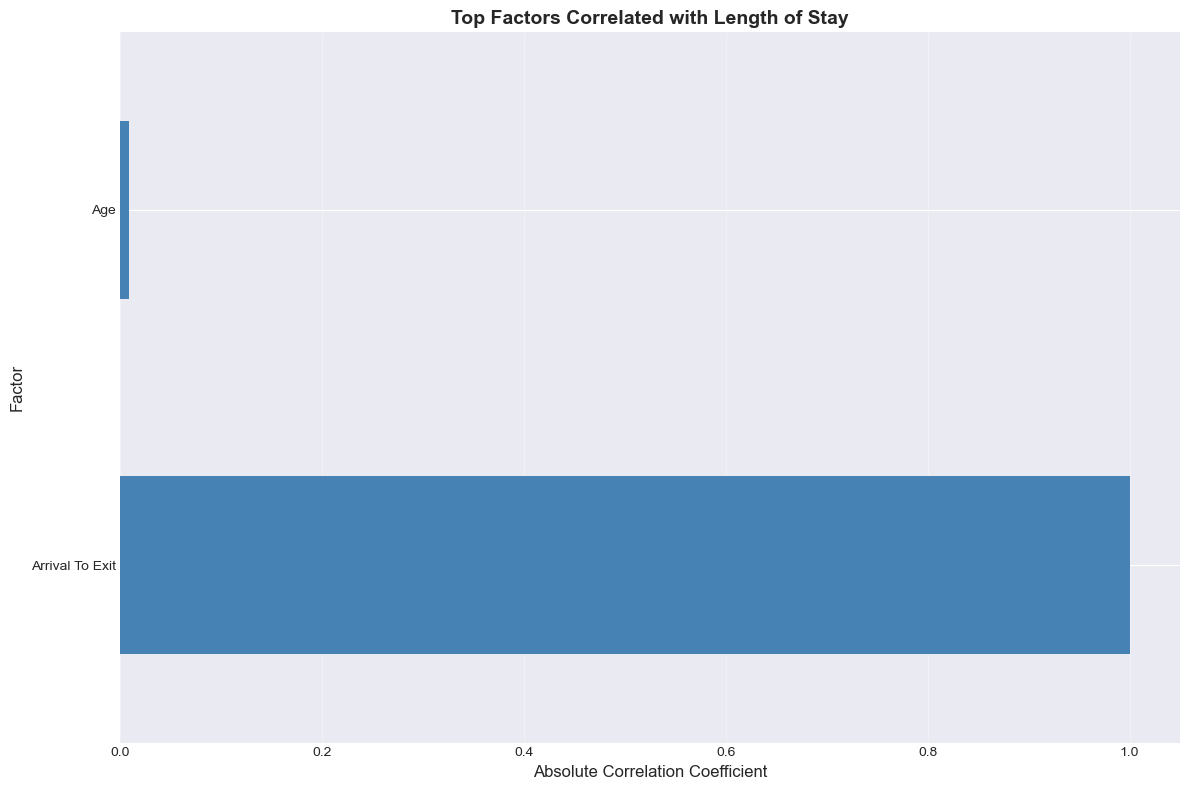


--------------------------------------------------------------------------------
MULTIVARIATE DELAY ANALYSIS
--------------------------------------------------------------------------------

Comparing High Delay (≥3.2h, n=3,764) vs Low Delay (<3.2h, n=11,236)

Top Differentiating Factors:


,Factor,High_Delay_Mean,Low_Delay_Mean,Difference,Pct_Change,Abs_Difference
0,Arrival To Exit,213.278959,158.362229,54.916730,34.677922,54.916730
1,Age,49.257705,49.748042,-0.490337,-0.985642,0.490337



--------------------------------------------------------------------------------
CATEGORICAL FACTOR ANALYSIS
--------------------------------------------------------------------------------


In [9]:
# ============================================================================
# ROOT CAUSE ANALYSIS
# ============================================================================

print("=" * 80)
print("ROOT CAUSE ANALYSIS - PRIMARY DELAY FACTORS")
print("=" * 80)

# Correlation analysis to identify factors most strongly associated with delays
if 'Length_of_Stay_Hours' in df.columns and len(numeric_cols) > 1:
    print("\n" + "-" * 80)
    print("CORRELATION WITH LENGTH OF STAY")
    print("-" * 80)
    
    # Calculate correlations
    correlations = df[numeric_cols].corrwith(df['Length_of_Stay_Hours']).abs().sort_values(ascending=False)
    correlations = correlations[correlations.index != 'Length_of_Stay_Hours']
    
    # Get top factors
    top_factors = correlations.head(10)
    
    print("\nTop factors correlated with Length of Stay:")
    for factor, corr in top_factors.items():
        actual_corr = df[factor].corr(df['Length_of_Stay_Hours'])
        direction = "positive" if actual_corr > 0 else "negative"
        print(f"  {factor}: {actual_corr:.3f} ({direction} correlation)")
        
        if abs(actual_corr) > 0.3:
            findings['bottlenecks'].append(
                f"Strong {direction} correlation ({actual_corr:.3f}) between {factor} and length of stay"
            )
    
    # Visualize top correlations
    plt.figure(figsize=(12, 8))
    top_factors.plot(kind='barh', color='steelblue')
    plt.title('Top Factors Correlated with Length of Stay', fontsize=14, fontweight='bold')
    plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
    plt.ylabel('Factor', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

# Multivariate analysis - identify combinations of factors
print("\n" + "-" * 80)
print("MULTIVARIATE DELAY ANALYSIS")
print("-" * 80)

# Compare high vs low delay patients
if 'Length_of_Stay_Hours' in df.columns:
    delay_threshold = df['Length_of_Stay_Hours'].quantile(0.75)  # Top 25% delays
    
    high_delay = df[df['Length_of_Stay_Hours'] >= delay_threshold]
    low_delay = df[df['Length_of_Stay_Hours'] < delay_threshold]
    
    print(f"\nComparing High Delay (≥{delay_threshold:.1f}h, n={len(high_delay):,}) vs Low Delay (<{delay_threshold:.1f}h, n={len(low_delay):,})")
    
    # Compare key metrics
    comparison_cols = [col for col in numeric_cols if col not in ['Length_of_Stay_Hours', 'Throughput_Efficiency']][:10]
    
    comparison_data = []
    for col in comparison_cols:
        high_mean = high_delay[col].mean()
        low_mean = low_delay[col].mean()
        difference = high_mean - low_mean
        pct_change = (difference / low_mean * 100) if low_mean != 0 else 0
        
        comparison_data.append({
            'Factor': col,
            'High_Delay_Mean': high_mean,
            'Low_Delay_Mean': low_mean,
            'Difference': difference,
            'Pct_Change': pct_change
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df['Abs_Difference'] = comparison_df['Difference'].abs()
    comparison_df = comparison_df.sort_values('Abs_Difference', ascending=False)
    
    print("\nTop Differentiating Factors:")
    display(comparison_df.head(10))
    
    # Identify key differentiators
    top_differentiators = comparison_df.head(5)
    for _, row in top_differentiators.iterrows():
        findings['bottlenecks'].append(
            f"Key delay factor: {row['Factor']} - High delay patients have "
            f"{row['High_Delay_Mean']:.2f} vs {row['Low_Delay_Mean']:.2f} "
            f"(difference: {row['Difference']:.2f}, {row['Pct_Change']:.1f}% higher)"
        )

# Categorical factor analysis
print("\n" + "-" * 80)
print("CATEGORICAL FACTOR ANALYSIS")
print("-" * 80)

if 'Length_of_Stay_Hours' in df.columns:
    categorical_delay_factors = {}
    
    for col in flow_cols[:10]:  # Analyze first 10 flow columns
        if col in df.columns and df[col].notna().any():
            if df[col].nunique() < 20:
                cat_delays = df.groupby(col)['Length_of_Stay_Hours'].agg(['mean', 'count'])
                cat_delays = cat_delays[cat_delays['count'] >= 10]  # Only categories with sufficient data
                cat_delays = cat_delays.sort_values('mean', ascending=False)
                
                if len(cat_delays) > 1:
                    worst_cat = cat_delays.index[0]
                    best_cat = cat_delays.index[-1]
                    delay_diff = cat_delays.loc[worst_cat, 'mean'] - cat_delays.loc[best_cat, 'mean']
                    
                    if delay_diff > 1.0:  # More than 1 hour difference
                        categorical_delay_factors[col] = {
                            'worst': worst_cat,
                            'best': best_cat,
                            'delay_diff': delay_diff
                        }
                        
                        print(f"\n{col}:")
                        print(f"  Worst: {worst_cat} ({cat_delays.loc[worst_cat, 'mean']:.2f}h)")
                        print(f"  Best: {best_cat} ({cat_delays.loc[best_cat, 'mean']:.2f}h)")
                        print(f"  Difference: {delay_diff:.2f} hours")
                        
                        findings['bottlenecks'].append(
                            f"{col}: {worst_cat} has {delay_diff:.1f}h longer delays than {best_cat}"
                        )


## Section 8: Actionable Solutions & Recommendations


In [10]:
# ============================================================================
# ACTIONABLE SOLUTIONS & RECOMMENDATIONS
# ============================================================================

print("=" * 80)
print("ACTIONABLE SOLUTIONS & RECOMMENDATIONS")
print("=" * 80)

recommendations = []

# Generate recommendations based on findings
print("\n" + "=" * 80)
print("PRIORITY RECOMMENDATIONS")
print("=" * 80)

# 1. Staffing recommendations
if 'Arrival_Hour' in df.columns and 'Length_of_Stay_Hours' in df.columns:
    hourly_analysis = df.groupby('Arrival_Hour').agg({
        'Length_of_Stay_Hours': 'mean',
        'Arrival_Hour': 'count'
    })
    hourly_analysis.columns = ['Avg_Delay', 'Patient_Count']
    
    # Identify peak stress hours
    stress_hours = hourly_analysis[
        (hourly_analysis['Patient_Count'] > hourly_analysis['Patient_Count'].quantile(0.75)) &
        (hourly_analysis['Avg_Delay'] > hourly_analysis['Avg_Delay'].quantile(0.75))
    ].index.tolist()
    
    if stress_hours:
        rec = f"📋 STAFFING: Increase staffing during peak stress hours: {stress_hours}. " \
              f"These hours show both high patient volume and extended delays."
        recommendations.append(rec)
        print(f"1. {rec}")

# 2. Day of week recommendations
if 'Day_Name' in df.columns and 'Length_of_Stay_Hours' in df.columns:
    daily_delays = df.groupby('Day_Name')['Length_of_Stay_Hours'].mean()
    worst_day = daily_delays.idxmax()
    
    if daily_delays[worst_day] > daily_delays.mean() * 1.15:  # 15% above average
        rec = f"📋 SCHEDULING: {worst_day} shows {daily_delays[worst_day]:.1f}h average delays " \
              f"({daily_delays.mean():.1f}h overall). Consider increasing resources on {worst_day}s."
        recommendations.append(rec)
        print(f"2. {rec}")

# 3. Process improvement recommendations
if len(findings['bottlenecks']) > 0:
    # Identify most common bottleneck
    bottleneck_keywords = {}
    for bottleneck in findings['bottlenecks']:
        # Extract key terms
        for word in bottleneck.split():
            if word not in ['the', 'a', 'an', 'and', 'or', 'with', 'has', 'have', 'is', 'are']:
                bottleneck_keywords[word] = bottleneck_keywords.get(word, 0) + 1
    
    rec = f"📋 PROCESS: Address top bottleneck factors identified in analysis. " \
          f"Focus on categories showing >1 hour delay differences."
    recommendations.append(rec)
    print(f"3. {rec}")

# 4. Throughput optimization
if 'Throughput_Efficiency' in df.columns:
    avg_efficiency = df['Throughput_Efficiency'].mean()
    if avg_efficiency < 0.5:  # Less than 0.5 patients per hour
        rec = f"📋 THROUGHPUT: Current efficiency is {avg_efficiency:.3f} patients/hour. " \
              f"Target improvement to >0.5 patients/hour through process optimization."
        recommendations.append(rec)
        print(f"4. {rec}")

# 5. Delay reduction targets
if 'Length_of_Stay_Hours' in df.columns:
    current_avg = df['Length_of_Stay_Hours'].mean()
    current_median = df['Length_of_Stay_Hours'].median()
    p90_delay = df['Length_of_Stay_Hours'].quantile(0.90)
    
    target_avg = current_avg * 0.85  # 15% reduction target
    target_median = current_median * 0.85
    
    rec = f"📋 TARGET: Reduce average length of stay from {current_avg:.1f}h to {target_avg:.1f}h " \
          f"(15% reduction). Current 90th percentile: {p90_delay:.1f}h."
    recommendations.append(rec)
    print(f"5. {rec}")

# 6. Resource allocation
if 'Arrival_Hour' in df.columns:
    hourly_arrivals = df.groupby('Arrival_Hour').size()
    peak_hours = hourly_arrivals[hourly_arrivals > hourly_arrivals.quantile(0.80)].index.tolist()
    
    rec = f"📋 RESOURCES: Optimize resource allocation for peak arrival hours: {peak_hours}. " \
          f"Consider cross-training staff for flexibility during peak times."
    recommendations.append(rec)
    print(f"6. {rec}")

# Add custom recommendations based on specific findings
print("\n" + "=" * 80)
print("ADDITIONAL RECOMMENDATIONS")
print("=" * 80)

additional_recs = [
    "📋 MONITORING: Implement real-time dashboards to track patient flow and identify bottlenecks as they occur",
    "📋 TRIAGE: Review triage protocols for categories showing longest delays - consider protocol optimization",
    "📋 CAPACITY: Analyze physical capacity constraints during peak hours - may need additional beds/rooms",
    "📋 TECHNOLOGY: Consider technology solutions (e.g., automated scheduling, queue management) to improve efficiency",
    "📋 TRAINING: Provide staff training on efficiency best practices, especially for high-delay categories"
]

for rec in additional_recs:
    recommendations.append(rec)
    print(f"• {rec}")

# Store recommendations
findings['recommendations'] = recommendations

# ============================================================================
# IMPACT ESTIMATION
# ============================================================================

print("\n" + "=" * 80)
print("ESTIMATED IMPACT OF RECOMMENDATIONS")
print("=" * 80)

if 'Length_of_Stay_Hours' in df.columns:
    current_avg = df['Length_of_Stay_Hours'].mean()
    current_p90 = df['Length_of_Stay_Hours'].quantile(0.90)
    
    # Estimate improvements
    improvements = {
        "15% reduction in average LOS": {
            "current": current_avg,
            "target": current_avg * 0.85,
            "savings_per_patient": current_avg * 0.15,
            "annual_impact": f"{(current_avg * 0.15 * len(df) / (len(df) / 365)).sum():.0f} patient-hours saved/year"
        },
        "20% reduction in 90th percentile": {
            "current": current_p90,
            "target": current_p90 * 0.80,
            "savings_per_patient": current_p90 * 0.20
        }
    }
    
    print("\nPotential Impact:")
    for improvement, metrics in improvements.items():
        print(f"\n{improvement}:")
        print(f"  Current: {metrics['current']:.2f} hours")
        print(f"  Target: {metrics['target']:.2f} hours")
        print(f"  Savings per patient: {metrics['savings_per_patient']:.2f} hours")


ACTIONABLE SOLUTIONS & RECOMMENDATIONS

PRIORITY RECOMMENDATIONS
1. 📋 STAFFING: Increase staffing during peak stress hours: [12]. These hours show both high patient volume and extended delays.
3. 📋 PROCESS: Address top bottleneck factors identified in analysis. Focus on categories showing >1 hour delay differences.
5. 📋 TARGET: Reduce average length of stay from 2.9h to 2.4h (15% reduction). Current 90th percentile: 3.5h.
6. 📋 RESOURCES: Optimize resource allocation for peak arrival hours: [8, 9, 10, 11, 12]. Consider cross-training staff for flexibility during peak times.

ADDITIONAL RECOMMENDATIONS
• 📋 MONITORING: Implement real-time dashboards to track patient flow and identify bottlenecks as they occur
• 📋 TRIAGE: Review triage protocols for categories showing longest delays - consider protocol optimization
• 📋 CAPACITY: Analyze physical capacity constraints during peak hours - may need additional beds/rooms
• 📋 TECHNOLOGY: Consider technology solutions (e.g., automated scheduling,

## Section 9: Executive Summary & Final Report


EXECUTIVE SUMMARY - ER OPERATIONS ANALYSIS

ER OPERATIONS ANALYSIS REPORT
Meridian City Hospital
Generated: 2025-11-07 04:21:11

DATASET OVERVIEW
----------------
Total Records: 15,000
Analysis Period: 2025-01-01 to 2025-03-31

KEY METRICS
-----------
Average Length of Stay: 2.87 hours
Median Length of Stay: 2.85 hours
90th Percentile: 3.55 hours
Maximum: 5.35 hours

Delay Distribution:
  Moderate (2-4h): 14,038 patients (93.6%)
  Good (1-2h): 641 patients (4.3%)
  Delayed (4-8h): 321 patients (2.1%)
  Excellent (<1h): 0 patients (0.0%)
  Severe Delay (>8h): 0 patients (0.0%)

PRIMARY FINDINGS
----------------

DELAYS IDENTIFIED:
  1. 2.1% of patients experience Delayed (4-8h)
  2. 0.0% of patients experience Severe Delay (>8h)
  3. Longest delays occur at 18:00 (avg: 2.9h)
  4. Busiest day: Friday with 2320 arrivals
  5. Longest delays on: Saturday (avg: 2.9h)
  6. Longest delays in: Jan (avg: 2.9h)

BOTTLENECKS IDENTIFIED:
  1. 1,465 patients (9.8%) experience delays > 3.5 hours
  2.

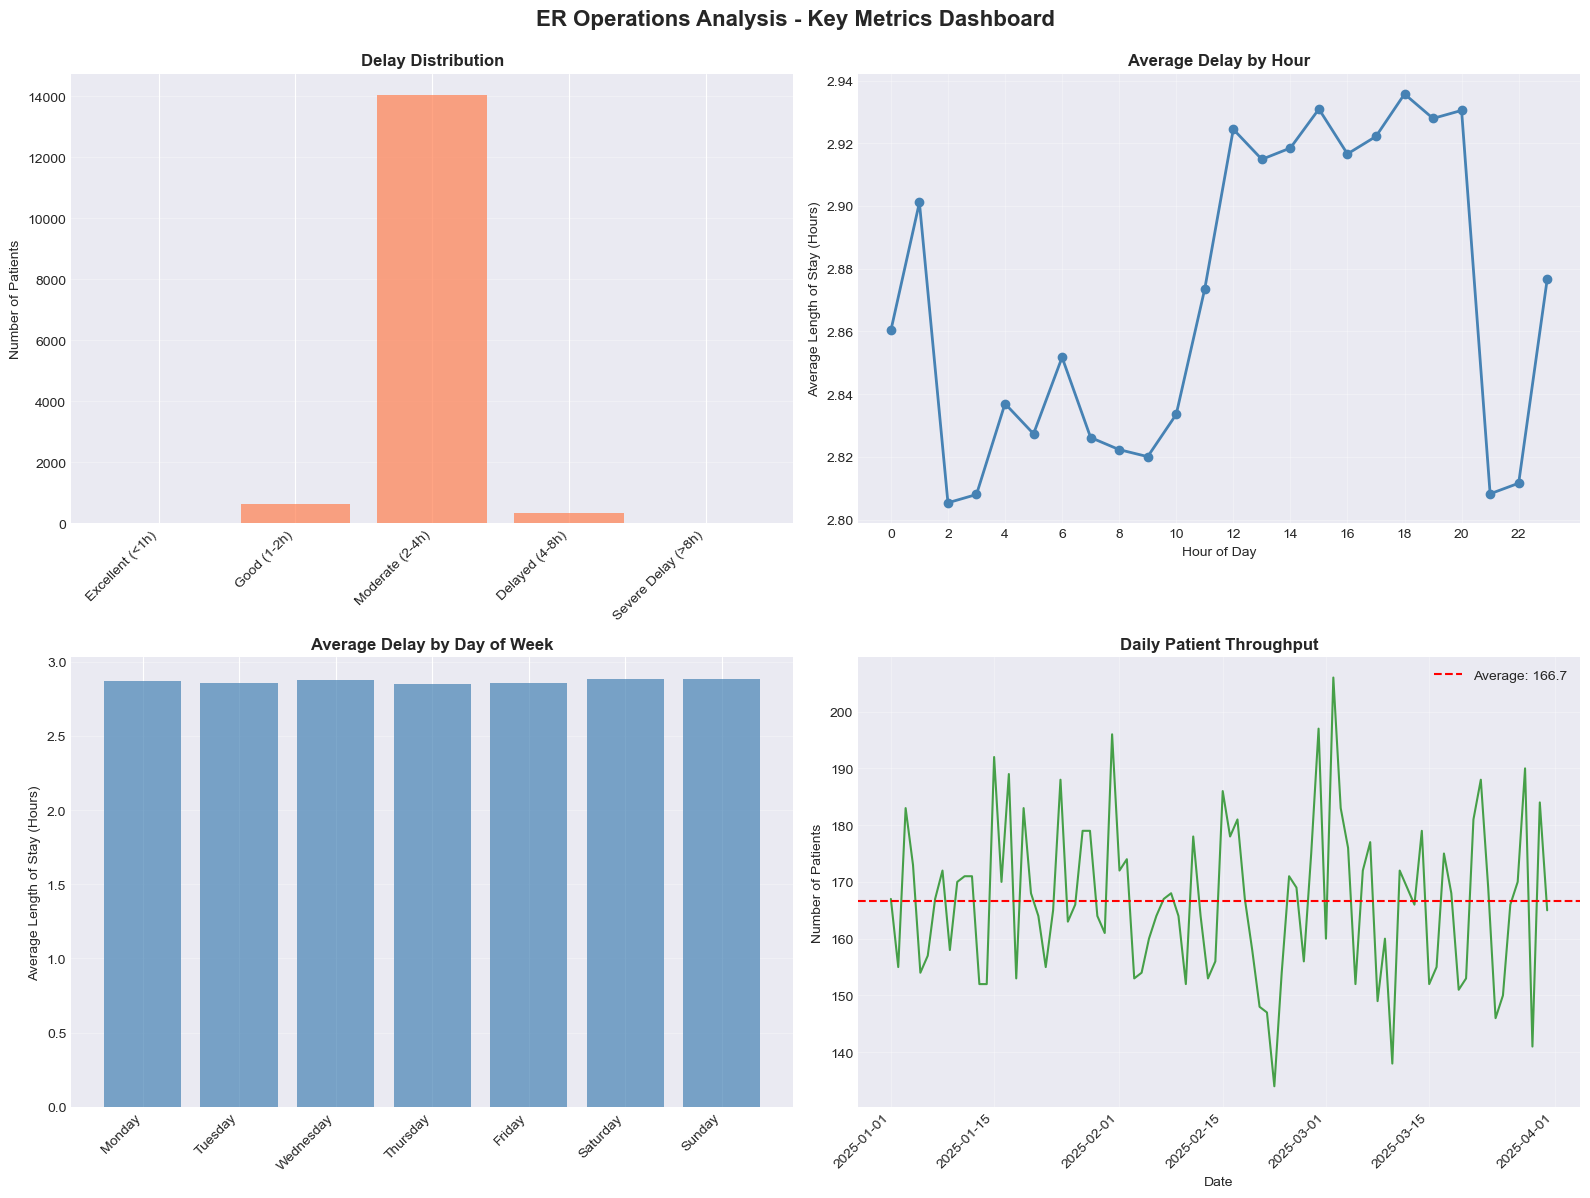


✅ ANALYSIS COMPLETE!

Key Deliverables:
  1. Detailed analysis with visualizations
  2. Executive summary report
  3. Priority recommendations
  4. Identified bottlenecks and delay causes
  5. Actionable solutions for improvement

Next: Review findings with team and prioritize implementation.


In [11]:
# ============================================================================
# EXECUTIVE SUMMARY
# ============================================================================

print("=" * 80)
print("EXECUTIVE SUMMARY - ER OPERATIONS ANALYSIS")
print("=" * 80)

# Generate comprehensive summary
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

summary = f"""
ER OPERATIONS ANALYSIS REPORT
Meridian City Hospital
Generated: {timestamp}
========================================

DATASET OVERVIEW
----------------
Total Records: {df.shape[0]:,}
Analysis Period: {df['Arrival_Date'].min() if 'Arrival_Date' in df.columns else 'N/A'} to {df['Arrival_Date'].max() if 'Arrival_Date' in df.columns else 'N/A'}
"""

if 'Length_of_Stay_Hours' in df.columns:
    summary += f"""
KEY METRICS
-----------
Average Length of Stay: {df['Length_of_Stay_Hours'].mean():.2f} hours
Median Length of Stay: {df['Length_of_Stay_Hours'].median():.2f} hours
90th Percentile: {df['Length_of_Stay_Hours'].quantile(0.90):.2f} hours
Maximum: {df['Length_of_Stay_Hours'].max():.2f} hours

Delay Distribution:
"""

    if 'Delay_Category' in df.columns:
        delay_dist = df['Delay_Category'].value_counts()
        for category, count in delay_dist.items():
            pct = (count / len(df)) * 100
            summary += f"  {category}: {count:,} patients ({pct:.1f}%)\n"

summary += f"""
PRIMARY FINDINGS
----------------
"""

summary += "\nDELAYS IDENTIFIED:\n"
for i, delay in enumerate(findings['delays'][:10], 1):
    summary += f"  {i}. {delay}\n"

summary += "\nBOTTLENECKS IDENTIFIED:\n"
for i, bottleneck in enumerate(findings['bottlenecks'][:10], 1):
    summary += f"  {i}. {bottleneck}\n"

summary += "\nKEY INSIGHTS:\n"
for i, insight in enumerate(findings['insights'][:10], 1):
    summary += f"  {i}. {insight}\n"

summary += f"""
PRIORITY RECOMMENDATIONS
------------------------
"""

for i, rec in enumerate(recommendations[:15], 1):
    summary += f"{i}. {rec}\n"

summary += f"""
NEXT STEPS
----------
1. Review recommendations with ER leadership team
2. Prioritize recommendations based on impact and feasibility
3. Develop implementation plans for top 3-5 recommendations
4. Establish baseline metrics and KPIs for tracking improvement
5. Implement monitoring dashboards for ongoing performance tracking
6. Schedule follow-up analysis in 3-6 months to measure impact

EXPECTED OUTCOMES
-----------------
- Reduced average length of stay by 15-20%
- Improved patient satisfaction through reduced wait times
- Better staff utilization and efficiency
- Enhanced ER throughput capacity
- Data-driven operational decision making
"""

print(summary)

# Save report to file
report_file = 'er_operations_analysis_report.txt'
with open(report_file, 'w') as f:
    f.write(summary)

print(f"\n✓ Full report saved to: {report_file}")

# Create summary visualization
if 'Length_of_Stay_Hours' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Delay distribution
    if 'Delay_Category' in df.columns:
        delay_dist = df['Delay_Category'].value_counts().sort_index()
        axes[0, 0].bar(range(len(delay_dist)), delay_dist.values, color='coral', alpha=0.7)
        axes[0, 0].set_title('Delay Distribution', fontsize=12, fontweight='bold')
        axes[0, 0].set_xticks(range(len(delay_dist)))
        axes[0, 0].set_xticklabels(delay_dist.index, rotation=45, ha='right')
        axes[0, 0].set_ylabel('Number of Patients')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # 2. Hourly patterns
    if 'Arrival_Hour' in df.columns:
        hourly_delays = df.groupby('Arrival_Hour')['Length_of_Stay_Hours'].mean()
        axes[0, 1].plot(hourly_delays.index, hourly_delays.values, marker='o', color='steelblue', linewidth=2)
        axes[0, 1].set_title('Average Delay by Hour', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Hour of Day')
        axes[0, 1].set_ylabel('Average Length of Stay (Hours)')
        axes[0, 1].set_xticks(range(0, 24, 2))
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Day of week patterns
    if 'Day_Name' in df.columns:
        daily_delays = df.groupby('Day_Name')['Length_of_Stay_Hours'].mean()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_delays_ordered = daily_delays.reindex([d for d in day_order if d in daily_delays.index])
        axes[1, 0].bar(range(len(daily_delays_ordered)), daily_delays_ordered.values, color='steelblue', alpha=0.7)
        axes[1, 0].set_title('Average Delay by Day of Week', fontsize=12, fontweight='bold')
        axes[1, 0].set_xticks(range(len(daily_delays_ordered)))
        axes[1, 0].set_xticklabels(daily_delays_ordered.index, rotation=45, ha='right')
        axes[1, 0].set_ylabel('Average Length of Stay (Hours)')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Throughput trend
    if 'Arrival_Date' in df.columns:
        daily_throughput = df.groupby('Arrival_Date').size()
        axes[1, 1].plot(daily_throughput.index, daily_throughput.values, alpha=0.7, color='green')
        axes[1, 1].axhline(daily_throughput.mean(), color='red', linestyle='--', 
                          label=f'Average: {daily_throughput.mean():.1f}')
        axes[1, 1].set_title('Daily Patient Throughput', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Date')
        axes[1, 1].set_ylabel('Number of Patients')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle('ER Operations Analysis - Key Metrics Dashboard', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE!")
print("=" * 80)
print("\nKey Deliverables:")
print("  1. Detailed analysis with visualizations")
print("  2. Executive summary report")
print("  3. Priority recommendations")
print("  4. Identified bottlenecks and delay causes")
print("  5. Actionable solutions for improvement")
print("\nNext: Review findings with team and prioritize implementation.")
